In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install wrds -q
import wrds

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CRSP historical shares pull from wrds

In [ ]:
# Define the path to the pgpass file
pgpass_path = "/content/drive/MyDrive/SIF Test/pgpass.txt"


# Set permissions to read-only (necessary for PostgreSQL to accept it)
os.chmod(pgpass_path, 0o600)

os.environ['PGPASSFILE'] = pgpass_path

# Connect to WRDS
db = wrds.Connection(wrds_username='kylerzarate', autoconnect=True)

Loading library list...
Done


In [ ]:
# Define the query
state = "AZ"
start_date = "1995-03-14"
end_date = "1998-04-01"
crsp_query = f"""
    SELECT DISTINCT
        ch.gvkey,
        ch.hstate,
        linkhist.lpermco AS permco,
        dsf.shrout,
        dsf.date
    FROM
        crsp_q_ccm.comphist AS ch
    LEFT JOIN
        crsp_q_ccm.ccm_lookup AS linkhist
    ON
        ch.gvkey = linkhist.gvkey
    LEFT JOIN
        crspq.dsf as dsf
    ON
        linkhist.lpermno = dsf.permno
    WHERE
        ch.hstate = '{state}' AND
        dsf.date > '{start_date}' AND
        dsf.date < '{end_date}'

    ORDER BY
        ch.gvkey DESC,
        dsf.date ASC
"""
# Execute the query
extra_data = db.raw_sql(crsp_query)
db.close()

extra_data

,gvkey,hstate,permco,shrout,date
0,179731,AZ,14309.0,4023.0,1996-01-25
1,179731,AZ,14309.0,4023.0,1996-01-26
2,179731,AZ,14309.0,4023.0,1996-01-29
3,179731,AZ,14309.0,4023.0,1996-01-30
4,179731,AZ,14309.0,4023.0,1996-01-31
...,...,...,...,...,...
103842,001075,AZ,21409.0,84718.0,1998-03-25
103843,001075,AZ,21409.0,84718.0,1998-03-26
103844,001075,AZ,21409.0,84718.0,1998-03-27
103845,001075,AZ,21409.0,84718.0,1998-03-30


#Setup

In [ ]:
historical_prices = pd.read_csv('/content/drive/MyDrive/state data stock index/arizona.csv', index_col=False)

In [ ]:
extra_data.rename(columns={'gvkey': 'GVKEY',
                           'shrout': 'cshoc',
                           'date':'datadate'}, inplace=True)
extra_data['datadate'] = pd.to_datetime(extra_data['datadate'])
extra_data['GVKEY'] = extra_data['GVKEY'].astype(int)
extra_data

,GVKEY,hstate,permco,cshoc,datadate
0,179731,AZ,14309.0,4023.0,1996-01-25
1,179731,AZ,14309.0,4023.0,1996-01-26
2,179731,AZ,14309.0,4023.0,1996-01-29
3,179731,AZ,14309.0,4023.0,1996-01-30
4,179731,AZ,14309.0,4023.0,1996-01-31
...,...,...,...,...,...
103842,1075,AZ,21409.0,84718.0,1998-03-25
103843,1075,AZ,21409.0,84718.0,1998-03-26
103844,1075,AZ,21409.0,84718.0,1998-03-27
103845,1075,AZ,21409.0,84718.0,1998-03-30


In [ ]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103847 entries, 0 to 103846
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   GVKEY     103847 non-null  int64         
 1   hstate    103847 non-null  string        
 2   permco    103847 non-null  Float64       
 3   cshoc     103847 non-null  Float64       
 4   datadate  103847 non-null  datetime64[ns]
dtypes: Float64(2), datetime64[ns](1), int64(1), string(1)
memory usage: 4.2 MB


In [ ]:
historical_prices.sort_values(by=['conml', 'datadate'], inplace=True)
historical_prices['datadate'] = pd.to_datetime(historical_prices['datadate'])
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,dvi,prccd,trfd,exchg,tpci,conml,gsector,naics,priusa,state
21748,1906,1,1,1994-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.250000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
20012,1906,1,1,1994-09-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.250000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
21744,1906,1,1,1994-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.125000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
20657,1906,1,1,1994-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.750000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
21740,1906,1,1,1994-09-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.750000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541403,166756,1,1,2024-04-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ
541395,166756,1,1,2025-01-22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.003003,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ
541315,166756,1,1,2025-01-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ
541060,166756,1,1,2025-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000100,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ


In [ ]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599178 entries, 21748 to 541115
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   GVKEY           599178 non-null  int64         
 1   LIID            599178 non-null  int64         
 2   iid             599178 non-null  int64         
 3   datadate        599178 non-null  datetime64[ns]
 4   capgn           98 non-null      float64       
 5   cheqv           30 non-null      float64       
 6   div             3026 non-null    float64       
 7   divd            2943 non-null    float64       
 8   divdpaydateind  0 non-null       float64       
 9   divsp           445 non-null     float64       
 10  dvrated         2671 non-null    float64       
 11  paydateind      0 non-null       float64       
 12  anncdate        2620 non-null    object        
 13  capgnpaydate    98 non-null      object        
 14  cheqvpaydate    29 non-null      obje

In [ ]:
# Merge extra data and historical prices
historical_prices = pd.merge(historical_prices, extra_data[['GVKEY', 'datadate', 'cshoc']], on=['GVKEY', 'datadate'], how='left', suffixes=('','_y'))
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,prccd,trfd,exchg,tpci,conml,gsector,naics,priusa,state,cshoc_y
0,1906,1,1,1994-09-01,NaN,NaN,NaN,NaN,NaN,NaN,...,36.250000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,<NA>
1,1906,1,1,1994-09-02,NaN,NaN,NaN,NaN,NaN,NaN,...,36.250000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,<NA>
2,1906,1,1,1994-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,36.125000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,<NA>
3,1906,1,1,1994-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,35.750000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,<NA>
4,1906,1,1,1994-09-08,NaN,NaN,NaN,NaN,NaN,NaN,...,35.750000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600523,166756,1,1,2024-04-08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>
600524,166756,1,1,2025-01-22,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003003,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>
600525,166756,1,1,2025-01-31,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>
600526,166756,1,1,2025-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000100,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>


In [ ]:
# Filter out any dates between '3-14-2025' and 9-29-1998
historical_prices['datadate'] = pd.to_datetime(historical_prices['datadate'])
historical_prices = historical_prices[historical_prices['datadate'] <= '2025-03-14']
historical_prices = historical_prices[historical_prices['datadate'] >= '1995-03-14']
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,prccd,trfd,exchg,tpci,conml,gsector,naics,priusa,state,cshoc_y
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,<NA>
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,9095.0
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,9095.0
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,9095.0
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ,9095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600521,166756,1,1,2024-01-29,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>
600522,166756,1,1,2024-04-05,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>
600523,166756,1,1,2024-04-08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>
600524,166756,1,1,2025-01-22,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003003,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ,<NA>


In [ ]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586511 entries, 133 to 600525
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   GVKEY           586511 non-null  int64         
 1   LIID            586511 non-null  int64         
 2   iid             586511 non-null  int64         
 3   datadate        586511 non-null  datetime64[ns]
 4   capgn           96 non-null      float64       
 5   cheqv           30 non-null      float64       
 6   div             2992 non-null    float64       
 7   divd            2912 non-null    float64       
 8   divdpaydateind  0 non-null       float64       
 9   divsp           442 non-null     float64       
 10  dvrated         2676 non-null    float64       
 11  paydateind      0 non-null       float64       
 12  anncdate        2614 non-null    object        
 13  capgnpaydate    96 non-null      object        
 14  cheqvpaydate    29 non-null      object

In [ ]:
historical_prices['cshoc'].fillna(historical_prices['cshoc_y'], inplace=True)
historical_prices.drop(columns=['cshoc_y'], inplace=True)
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,dvi,prccd,trfd,exchg,tpci,conml,gsector,naics,priusa,state
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.000000,1.0,14,0,A V Homes Inc,25.0,236117.0,1,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600521,166756,1,1,2024-01-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ
600522,166756,1,1,2024-04-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ
600523,166756,1,1,2024-04-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000001,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ
600524,166756,1,1,2025-01-22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.003003,NaN,19,0,root9B Holdings Inc,20.0,541611.0,1,AZ


In [ ]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586511 entries, 133 to 600525
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   GVKEY           586511 non-null  int64         
 1   LIID            586511 non-null  int64         
 2   iid             586511 non-null  int64         
 3   datadate        586511 non-null  datetime64[ns]
 4   capgn           96 non-null      float64       
 5   cheqv           30 non-null      float64       
 6   div             2992 non-null    float64       
 7   divd            2912 non-null    float64       
 8   divdpaydateind  0 non-null       float64       
 9   divsp           442 non-null     float64       
 10  dvrated         2676 non-null    float64       
 11  paydateind      0 non-null       float64       
 12  anncdate        2614 non-null    object        
 13  capgnpaydate    96 non-null      object        
 14  cheqvpaydate    29 non-null      object

In [ ]:
historical_prices['exchg'].value_counts()

,count
exchg,
14,253587
11,198623
19,102793
12,18730
13,11368
20,1410


In [ ]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586511 entries, 133 to 600525
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   GVKEY           586511 non-null  int64         
 1   LIID            586511 non-null  int64         
 2   iid             586511 non-null  int64         
 3   datadate        586511 non-null  datetime64[ns]
 4   capgn           96 non-null      float64       
 5   cheqv           30 non-null      float64       
 6   div             2992 non-null    float64       
 7   divd            2912 non-null    float64       
 8   divdpaydateind  0 non-null       float64       
 9   divsp           442 non-null     float64       
 10  dvrated         2676 non-null    float64       
 11  paydateind      0 non-null       float64       
 12  anncdate        2614 non-null    object        
 13  capgnpaydate    96 non-null      object        
 14  cheqvpaydate    29 non-null      object

In [ ]:
exch_codes = [11, 12, 14]
historical_prices = historical_prices[historical_prices['exchg'].isin(exch_codes)]
# Filter out naics codes that contain 9999
historical_prices = historical_prices[historical_prices['naics'].astype(str).str.contains('9999') == False]
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,dvi,prccd,trfd,exchg,tpci,conml,gsector,naics,priusa,state
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,25.0,236117.0,1,AZ
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,25.0,236117.0,1,AZ
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,25.0,236117.0,1,AZ
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,25.0,236117.0,1,AZ
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,25.0,236117.0,1,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593146,134144,1,1,2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.44,1.000000,11,0,eFunds Corp,45.0,518210.0,1,AZ
593147,134144,1,1,2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.43,1.000000,11,0,eFunds Corp,45.0,518210.0,1,AZ
593148,134144,1,1,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.46,1.000000,11,0,eFunds Corp,45.0,518210.0,1,AZ
593149,134144,1,1,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.47,1.000000,11,0,eFunds Corp,45.0,518210.0,1,AZ


In [ ]:
# Change gsector codes into names
gics_sector_codes = {
    10: 'Energy',
    15: 'Materials',
    20: 'Industrials',
    25: 'Consumer Discretionary',
    30: 'Consumer Staples',
    35: 'Health Care',
    40: 'Financials',
    45: 'Information Technology',
    50: 'Comm. Services',
    55: 'Utilities',
    60: 'Real Estate'
}

historical_prices['gsector'] = historical_prices['gsector'].map(gics_sector_codes)
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,dvi,prccd,trfd,exchg,tpci,conml,gsector,naics,priusa,state
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.00,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593146,134144,1,1,2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.44,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ
593147,134144,1,1,2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.43,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ
593148,134144,1,1,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.46,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ
593149,134144,1,1,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.47,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ


In [ ]:
historical_prices.columns

Index(['GVKEY', 'LIID', 'iid', 'datadate', 'capgn', 'cheqv', 'div', 'divd',
       'divdpaydateind', 'divsp', 'dvrated', 'paydateind', 'anncdate',
       'capgnpaydate', 'cheqvpaydate', 'divdpaydate', 'divsppaydate',
       'paydate', 'recorddate', 'ajexdi', 'cshoc', 'cshtrd', 'dvi', 'prccd',
       'trfd', 'exchg', 'tpci', 'conml', 'gsector', 'naics', 'priusa',
       'state'],
      dtype='object')

In [ ]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467248 entries, 133 to 593150
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   GVKEY           467248 non-null  int64         
 1   LIID            467248 non-null  int64         
 2   iid             467248 non-null  int64         
 3   datadate        467248 non-null  datetime64[ns]
 4   capgn           91 non-null      float64       
 5   cheqv           25 non-null      float64       
 6   div             2914 non-null    float64       
 7   divd            2842 non-null    float64       
 8   divdpaydateind  0 non-null       float64       
 9   divsp           432 non-null     float64       
 10  dvrated         2621 non-null    float64       
 11  paydateind      0 non-null       float64       
 12  anncdate        2557 non-null    object        
 13  capgnpaydate    91 non-null      object        
 14  cheqvpaydate    24 non-null      object

In [ ]:
historical_prices['adjprc'] = historical_prices['prccd'] / historical_prices['ajexdi']
historical_prices['market cap'] = historical_prices['cshoc'] * historical_prices['prccd']
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,trfd,exchg,tpci,conml,gsector,naics,priusa,state,adjprc,market cap
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,<NA>
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593146,134144,1,1,2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.44,1733122840.0
593147,134144,1,1,2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.43,1732647230.0
593148,134144,1,1,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.46,1734074060.0
593149,134144,1,1,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.47,1734549670.0


In [ ]:
historical_prices.fillna({'trfd':1}, inplace=True)
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,trfd,exchg,tpci,conml,gsector,naics,priusa,state,adjprc,market cap
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,<NA>
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593146,134144,1,1,2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.44,1733122840.0
593147,134144,1,1,2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.43,1732647230.0
593148,134144,1,1,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.46,1734074060.0
593149,134144,1,1,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.47,1734549670.0


In [ ]:
# Find trtprc by dividing (current adjprc * trfd) by (previous adjprc * previous trfd) for each company
historical_prices['trtret'] = (
    (historical_prices['adjprc'] * historical_prices['trfd']) /
    (historical_prices.groupby(['conml', 'iid'])['adjprc'].shift(1) * historical_prices.groupby(['conml', 'iid'])['trfd'].shift(1))
) - 1
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,exchg,tpci,conml,gsector,naics,priusa,state,adjprc,market cap,trtret
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,<NA>,NaN
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593146,134144,1,1,2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.44,1733122840.0,0.001099
593147,134144,1,1,2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.43,1732647230.0,-0.000274
593148,134144,1,1,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.46,1734074060.0,0.000823
593149,134144,1,1,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.47,1734549670.0,0.000274


In [ ]:
historical_prices

,GVKEY,LIID,iid,datadate,capgn,cheqv,div,divd,divdpaydateind,divsp,...,exchg,tpci,conml,gsector,naics,priusa,state,adjprc,market cap,trtret
133,1906,1,1,1995-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,<NA>,NaN
134,1906,1,1,1995-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
135,1906,1,1,1995-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
136,1906,1,1,1995-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
137,1906,1,1,1995-03-20,NaN,NaN,NaN,NaN,NaN,NaN,...,14,0,A V Homes Inc,Consumer Discretionary,236117.0,1,AZ,36.00,327420.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593146,134144,1,1,2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.44,1733122840.0,0.001099
593147,134144,1,1,2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.43,1732647230.0,-0.000274
593148,134144,1,1,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.46,1734074060.0,0.000823
593149,134144,1,1,2007-09-11,NaN,NaN,NaN,NaN,NaN,NaN,...,11,0,eFunds Corp,Information Technology,518210.0,1,AZ,36.47,1734549670.0,0.000274


In [ ]:
historical_prices['trtret'].describe()

,trtret
count,467048.000000
mean,0.000832
std,0.039100
min,-0.776730
25%,-0.013287
50%,0.000000
75%,0.013281
max,5.162695


In [ ]:
price_pivot_table = pd.pivot_table(historical_prices, values='adjprc', index='datadate', columns=['conml', 'iid'])
price_pivot_table

conml,A V Homes Inc,AMMO Inc,APL Ltd,ASR Investments Corp,Accelerate Diagnostics Inc,Adflex Solutions Inc,Align Technology Inc,Allied Waste Industries Inc.,American Disposal Services Inc,American Residential Properties Inc,...,Voya Global Equity Dividend and Premium Opportunity Fund,Voya Infrastructure Industrials and Materials Fund,Voya International High Dividend Equity Income Fund,Voya Natural Resources Equity Income Fund,Western Alliance Bancorporation,White Electronic Designs Corp,WillScot Holdings Corporation,Wrap Technologies Inc,Zila Inc,eFunds Corp
iid,1,1,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,1,1,2,1
datadate,,,,,,,,,,,,,,,,,,,,,
1995-03-14,36.0,NaN,22.500,17.815,NaN,20.00,NaN,4.500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.938,NaN,NaN,21.875,NaN
1995-03-15,36.0,NaN,22.500,17.500,NaN,19.50,NaN,4.500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.938,NaN,NaN,22.316,NaN
1995-03-16,36.0,NaN,22.125,17.500,NaN,20.25,NaN,4.563,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.938,NaN,NaN,21.441,NaN
1995-03-17,36.0,NaN,22.250,17.815,NaN,21.75,NaN,4.625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.813,NaN,NaN,22.967,NaN
1995-03-20,36.0,NaN,22.250,17.815,NaN,20.75,NaN,4.563,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.813,NaN,NaN,23.625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,NaN,1.39,NaN,NaN,1.1000,NaN,163.39,NaN,NaN,NaN,...,5.55,10.2700,NaN,NaN,72.65,NaN,29.760,1.970,NaN,NaN
2025-03-11,NaN,1.43,NaN,NaN,1.1453,NaN,165.14,NaN,NaN,NaN,...,5.55,10.3300,NaN,NaN,73.65,NaN,30.070,1.950,NaN,NaN


In [ ]:
returns_pivot_table = pd.pivot_table(historical_prices, values='trtret', index='datadate', columns=['conml','iid'])
returns_pivot_table

conml,A V Homes Inc,AMMO Inc,APL Ltd,ASR Investments Corp,Accelerate Diagnostics Inc,Adflex Solutions Inc,Align Technology Inc,Allied Waste Industries Inc.,American Disposal Services Inc,American Residential Properties Inc,...,Voya Global Equity Dividend and Premium Opportunity Fund,Voya Infrastructure Industrials and Materials Fund,Voya International High Dividend Equity Income Fund,Voya Natural Resources Equity Income Fund,Western Alliance Bancorporation,White Electronic Designs Corp,WillScot Holdings Corporation,Wrap Technologies Inc,Zila Inc,eFunds Corp
iid,1,1,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,1,1,2,1
datadate,,,,,,,,,,,,,,,,,,,,,
1995-03-15,0.000000,NaN,0.000000,-0.017682,NaN,-0.025000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.020160,NaN
1995-03-16,0.000000,NaN,-0.016667,0.000000,NaN,0.038462,NaN,0.014000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.039210,NaN
1995-03-17,0.000000,NaN,0.005650,0.018000,NaN,0.074074,NaN,0.013588,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.042546,NaN,NaN,0.071172,NaN
1995-03-20,0.000000,NaN,0.000000,0.000000,NaN,-0.045977,NaN,-0.013405,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.028650,NaN
1995-03-21,0.013889,NaN,0.005618,0.000000,NaN,-0.048193,NaN,0.013588,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.018370,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,NaN,-0.007143,NaN,NaN,-0.017857,NaN,-0.059626,NaN,NaN,NaN,...,-0.008929,-0.021495,NaN,NaN,-0.060277,NaN,0.060207,-0.066351,NaN,NaN
2025-03-11,NaN,0.028777,NaN,NaN,0.041182,NaN,0.010711,NaN,NaN,NaN,...,0.000000,0.005842,NaN,NaN,0.013765,NaN,0.010417,-0.010152,NaN,NaN


# Returns adjustment for outliers

In [ ]:
percentiles = returns_pivot_table.quantile([0.05, 0.95])
adj_returns_pivot_table = returns_pivot_table.clip(lower=percentiles.loc[0.05], upper=percentiles.loc[0.95], axis=1)

In [ ]:
regression_returns_pivot_table = returns_pivot_table.copy()

In [ ]:
# Find max return for each column and their corresponding dates
max_returns = returns_pivot_table.max()
max_dates = returns_pivot_table.idxmax()
max_returns_df = pd.DataFrame({'max_return': max_returns, 'max_date': max_dates})
max_returns_df

,,max_return,max_date
conml,iid,,
A V Homes Inc,1,0.287879,2018-06-07
AMMO Inc,1,0.343173,2021-01-13
APL Ltd,1,0.383721,1997-04-14
ASR Investments Corp,1,0.071429,1995-04-18
Accelerate Diagnostics Inc,1,1.413229,2012-04-23
...,...,...,...
White Electronic Designs Corp,1,0.304965,2000-04-27
WillScot Holdings Corporation,1,0.251029,2018-06-22
Wrap Technologies Inc,1,0.331858,2023-11-03


In [ ]:
max_adjusted_returns = adj_returns_pivot_table.max()
max_adjusted_dates = adj_returns_pivot_table.idxmax()
max_adjusted_returns_df = pd.DataFrame({'max_adjusted_return': max_adjusted_returns, 'max_adjusted_date': max_adjusted_dates})
max_adjusted_returns_df

,,max_adjusted_return,max_adjusted_date
conml,iid,,
A V Homes Inc,1,0.039428,1995-09-11
AMMO Inc,1,0.064435,2020-12-04
APL Ltd,1,0.026738,1995-04-12
ASR Investments Corp,1,0.022958,1995-03-27
Accelerate Diagnostics Inc,1,0.090909,1996-12-12
...,...,...,...
White Electronic Designs Corp,1,0.069216,1995-06-28
WillScot Holdings Corporation,1,0.039592,2017-12-01
Wrap Technologies Inc,1,0.089754,2018-12-26


# Market cap weighting

In [ ]:
historical_market_caps = pd.pivot_table(historical_prices, values='market cap', index='datadate', columns=['conml', 'iid'])
historical_market_caps.fillna(0, inplace=True)
historical_market_caps

conml,A V Homes Inc,AMMO Inc,APL Ltd,ASR Investments Corp,Accelerate Diagnostics Inc,Adflex Solutions Inc,Align Technology Inc,Allied Waste Industries Inc.,American Disposal Services Inc,American Residential Properties Inc,...,Voya Global Equity Dividend and Premium Opportunity Fund,Voya Infrastructure Industrials and Materials Fund,Voya International High Dividend Equity Income Fund,Voya Natural Resources Equity Income Fund,Western Alliance Bancorporation,White Electronic Designs Corp,WillScot Holdings Corporation,Wrap Technologies Inc,Zila Inc,eFunds Corp
iid,1,1,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,1,1,2,1
datadate,,,,,,,,,,,,,,,,,,,,,
1995-03-15,327420.0,0.0,614295.0,54250.0,0.0,127998.0,0.0,116437.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18847.27,0.0,0.0,76668.212,0.0
1995-03-16,327420.0,0.0,604056.75,54250.0,0.0,132921.0,0.0,118067.625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18847.27,0.0,0.0,73662.087,0.0
1995-03-17,327420.0,0.0,607469.5,55226.5,0.0,142767.0,0.0,119671.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18045.395,0.0,0.0,78904.769,0.0
1995-03-20,327420.0,0.0,607469.5,55226.5,0.0,136203.0,0.0,118067.625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18045.395,0.0,0.0,81165.375,0.0
1995-03-21,331967.5,0.0,610882.25,55226.5,0.0,129639.0,0.0,119671.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18045.395,0.0,0.0,79674.337,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10,0.0,165072230.0,0.0,0.0,27548400.0,0.0,12025177219.999998,0.0,0.0,0.0,...,437722950.0,160027140.0,0.0,0.0,8024483100.000001,0.0,5463192000.0,90389510.0,0.0,0.0
2025-03-11,0.0,169822510.0,0.0,0.0,28682893.2,0.0,12153973719.999998,0.0,0.0,0.0,...,437722950.0,160962060.0,0.0,0.0,8134937100.000001,0.0,5520100250.0,89471850.0,0.0,0.0


In [ ]:
total_market_caps = historical_market_caps.sum(axis=1)
total_market_caps

,0
datadate,
1995-03-15,35454233.678
1995-03-16,35501273.492
1995-03-17,35543615.329
1995-03-20,35553343.016
1995-03-21,35518179.478
...,...
2025-03-10,515693705899.600037
2025-03-11,517574948410.849976
2025-03-12,522160336305.200012


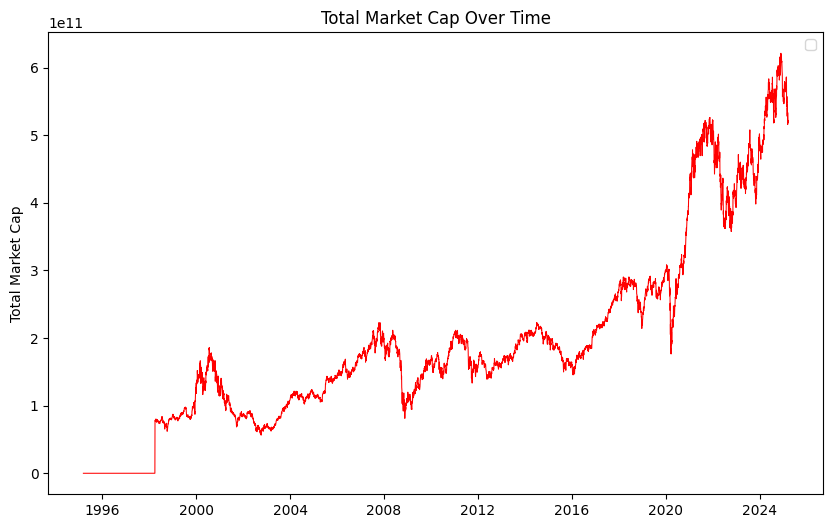

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_market_caps, color='red')
plt.ylabel('Total Market Cap')
plt.title('Total Market Cap Over Time')
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
# Get S&P 500 prices from same start and end date as index values
import yfinance as yf
sp500 = yf.Ticker('^GSPC')
sp500_df = sp500.history(start=total_market_caps.index[0], end=datetime.today().strftime('%Y-%m-%d'))
sp500 = sp500_df['Close']
# Convert index to same date format
total_market_caps.index = pd.to_datetime(total_market_caps.index)
sp500.index = pd.to_datetime(sp500.index)
sp500


,Close
Date,
1995-03-15 00:00:00-05:00,491.880005
1995-03-16 00:00:00-05:00,495.410004
1995-03-17 00:00:00-05:00,495.519989
1995-03-20 00:00:00-05:00,496.140015
1995-03-21 00:00:00-05:00,495.070007
...,...
2025-03-26 00:00:00-04:00,5712.200195
2025-03-27 00:00:00-04:00,5693.310059
2025-03-28 00:00:00-04:00,5580.939941


In [ ]:
# Calculate index values
sp_index_values = sp500 / sp500.iloc[0]
index_values = total_market_caps / total_market_caps.iloc[0]

In [ ]:
index_values

,0
datadate,
1995-03-15,1.0
1995-03-16,1.001327
1995-03-17,1.002521
1995-03-20,1.002795
1995-03-21,1.001804
...,...
2025-03-10,14545.334997
2025-03-11,14598.39615
2025-03-12,14727.72874


In [ ]:
# Give index_values a name
index_values.name = 'Utah Stock Index'

In [ ]:
# Print max value with corresponding date
print(index_values.idxmax())
print(index_values.max())
print(index_values.idxmin())
print(index_values.min())

2024-11-25 00:00:00
17516.794900081833
1995-03-15 00:00:00
1.0


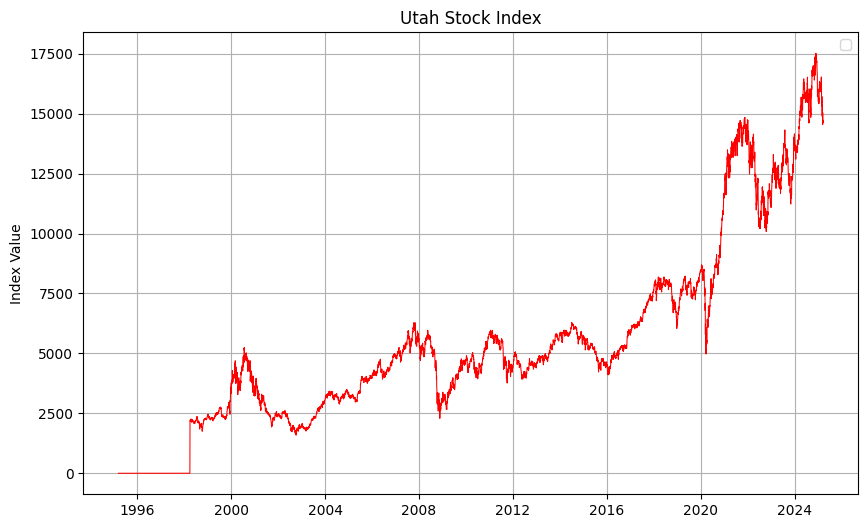

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(index_values, color='red')
plt.ylabel('Index Value')
plt.title('Utah Stock Index')
plt.legend()
plt.grid(True)
plt.show()

# Backtest

In [ ]:
total_market_caps

,0
datadate,
1995-03-15,35454233.678
1995-03-16,35501273.492
1995-03-17,35543615.329
1995-03-20,35553343.016
1995-03-21,35518179.478
...,...
2025-03-10,515693705899.600037
2025-03-11,517574948410.849976
2025-03-12,522160336305.200012


In [ ]:
total_market_caps = pd.DataFrame(total_market_caps)
total_market_caps.columns = ['total_market_cap']
total_market_caps

,total_market_cap
datadate,
1995-03-15,35454233.678
1995-03-16,35501273.492
1995-03-17,35543615.329
1995-03-20,35553343.016
1995-03-21,35518179.478
...,...
2025-03-10,515693705899.600037
2025-03-11,517574948410.849976
2025-03-12,522160336305.200012


<Axes: xlabel='datadate'>

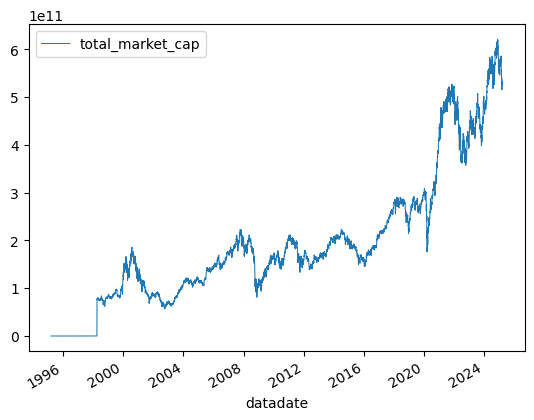

In [ ]:
total_market_caps.plot()

## BT Setup

In [ ]:
# Parameters
horizon = 30  # Backtest horizon in years
rebalancing_days = 63  # Default rebalancing period in trading days (roughly 3 months)

# Quarter  = 63, Semiannual = 126, Monthly = 21
end_date = total_market_caps.index[-1]
# Example data (ensure `total_market_caps` index is a DatetimeIndex of trading days)
bt_end_date = pd.to_datetime(end_date)
bt_start_date = bt_end_date - pd.DateOffset(years=horizon)

# Find index positions closest to the start and end dates using get_indexer with method='nearest'
date_index = total_market_caps.index
bt_start_idx = date_index.get_indexer([bt_start_date], method='nearest')[0]  # Nearest trading day to start date
bt_end_idx = date_index.get_indexer([bt_end_date], method='nearest')[0]  # Nearest trading day to end date

# Calculate rebalancing dates based on rebalancing_days (number of trading days)
rebalancing_indices = list(range(bt_start_idx, bt_end_idx, rebalancing_days))

# Extract actual rebalancing dates from index, ensuring they are trading days
rebalancing_dates = date_index[rebalancing_indices].tolist()

# Ensure last date is included if it's not already
if rebalancing_dates[-1] != bt_end_date:
    # If the last rebalancing date is not the exact end date, adjust it to the nearest available trading day
    last_rebalancing_date = date_index.get_indexer([bt_end_date], method='nearest')[0]
    rebalancing_dates.append(date_index[last_rebalancing_date])

print(rebalancing_dates)


[Timestamp('1995-03-15 00:00:00'), Timestamp('1995-06-14 00:00:00'), Timestamp('1995-09-13 00:00:00'), Timestamp('1995-12-12 00:00:00'), Timestamp('1996-03-13 00:00:00'), Timestamp('1996-06-12 00:00:00'), Timestamp('1996-09-11 00:00:00'), Timestamp('1996-12-10 00:00:00'), Timestamp('1997-03-12 00:00:00'), Timestamp('1997-06-11 00:00:00'), Timestamp('1997-09-10 00:00:00'), Timestamp('1997-12-09 00:00:00'), Timestamp('1998-03-12 00:00:00'), Timestamp('1998-06-11 00:00:00'), Timestamp('1998-09-10 00:00:00'), Timestamp('1998-12-09 00:00:00'), Timestamp('1999-03-12 00:00:00'), Timestamp('1999-06-11 00:00:00'), Timestamp('1999-09-10 00:00:00'), Timestamp('1999-12-09 00:00:00'), Timestamp('2000-03-10 00:00:00'), Timestamp('2000-06-09 00:00:00'), Timestamp('2000-09-08 00:00:00'), Timestamp('2000-12-07 00:00:00'), Timestamp('2001-03-12 00:00:00'), Timestamp('2001-06-11 00:00:00'), Timestamp('2001-09-10 00:00:00'), Timestamp('2001-12-13 00:00:00'), Timestamp('2002-03-18 00:00:00'), Timestamp('20

## MC weight

In [ ]:
weights = pd.DataFrame(index=historical_market_caps.index, columns=historical_market_caps.columns)
# Loop through each rebalancing date to calculate weights
for start_date in rebalancing_dates:
    # Find the index of the start date and the next rebalancing date (or end date)
    start_idx = historical_market_caps.index.get_loc(start_date)

    # Define the end date for the days (next rebalancing date or the last date of the days)
    if start_idx + rebalancing_days < len(historical_market_caps.index):
        end_date = historical_market_caps.index[start_idx + rebalancing_days]
    else:
        end_date = historical_market_caps.index[-1]  # Use last date if we're near the end

    # Extract market caps for the given days
    market_caps_at_start = historical_market_caps.loc[start_date].dropna()  # Drop NaNs for companies with no data

    # Calculate weights: market cap / sum of market caps (normalize to 1)
    total_market_cap = market_caps_at_start.sum()
    weights_for_days = market_caps_at_start / total_market_cap

    # Propagate weights for this days until the next rebalancing date
    weights.loc[start_date:end_date, weights_for_days.index] = weights_for_days.values

# Step 2: Calculate weighted returns for each days using the weights and returns
cumulative_returns_market_weighted_returns = pd.DataFrame(index=adj_returns_pivot_table.index, columns=['Returns'])

# Loop through each date to calculate the weighted returns for that date
for date in adj_returns_pivot_table.index:
    # Get the weights for the given date (from the weights DataFrame)
    current_weights = weights.loc[date].dropna()

    # Get the returns for the given date (from the adj_returns_pivot_table DataFrame)
    valid_columns = current_weights.index.intersection(adj_returns_pivot_table.columns)
    current_weights = current_weights.loc[valid_columns]  # Filter weights to match returns
    current_returns = adj_returns_pivot_table.loc[date, valid_columns]  # Match returns to weights


    # Calculate the weighted return for the date
    weighted_return = (current_weights * current_returns).sum()

    # Store the weighted return in the result DataFrame
    cumulative_returns_market_weighted_returns.loc[date] = weighted_return

regression_returns_market_weighted_returns = pd.DataFrame(index=regression_returns_pivot_table.index, columns=['Returns'])

# Loop through each date to calculate the weighted returns for that date
for date in regression_returns_pivot_table.index:
    # Get the weights for the given date (from the weights DataFrame)
    current_weights = weights.loc[date].dropna()

    # Get the returns for the given date (from the adj_returns_pivot_table DataFrame
    valid_columns = current_weights.index.intersection(regression_returns_pivot_table.columns)
    current_weights = current_weights.loc[valid_columns]  # Filter weights to match returns
    current_returns = regression_returns_pivot_table.loc[date, valid_columns]  # Match returns to weights

    # Calculate the weighted return for the date
    weighted_return = (current_weights * current_returns).sum()
    regression_returns_market_weighted_returns.loc[date] = weighted_return



In [ ]:
cumulative_returns_market_weighted_returns

,Returns
datadate,
1995-03-15,0.005793
1995-03-16,0.000862
1995-03-17,0.001262
1995-03-20,0.000075
1995-03-21,-0.000819
...,...
2025-03-10,-0.027172
2025-03-11,0.003237
2025-03-12,0.00949


In [ ]:
regression_returns_market_weighted_returns

,Returns
datadate,
1995-03-15,0.005574
1995-03-16,0.001327
1995-03-17,0.001228
1995-03-20,0.00033
1995-03-21,-0.000948
...,...
2025-03-10,-0.033188
2025-03-11,0.003983
2025-03-12,0.009535


In [ ]:
# Filter up to bt_start_date
cumulative_returns_market_weighted_returns = cumulative_returns_market_weighted_returns[cumulative_returns_market_weighted_returns.index >= bt_start_date]

cumulative_returns_market_weighted_returns

,Returns
datadate,
1995-03-15,0.005793
1995-03-16,0.000862
1995-03-17,0.001262
1995-03-20,0.000075
1995-03-21,-0.000819
...,...
2025-03-10,-0.027172
2025-03-11,0.003237
2025-03-12,0.00949


In [ ]:
regression_returns_market_weighted_returns = regression_returns_market_weighted_returns[regression_returns_market_weighted_returns.index >= bt_start_date]
regression_returns_market_weighted_returns

,Returns
datadate,
1995-03-15,0.005574
1995-03-16,0.001327
1995-03-17,0.001228
1995-03-20,0.00033
1995-03-21,-0.000948
...,...
2025-03-10,-0.033188
2025-03-11,0.003983
2025-03-12,0.009535


In [ ]:
market_weighted_cumulative_returns = pd.Series(index=returns_pivot_table.index, data=0)

# Calculate cumulative weighted returns for the portfolio
market_weighted_cumulative_returns = (1 + cumulative_returns_market_weighted_returns).cumprod() - 1

# Display the cumulative weighted returns
market_weighted_cumulative_returns

,Returns
datadate,
1995-03-15,0.005793
1995-03-16,0.00666
1995-03-17,0.00793
1995-03-20,0.008006
1995-03-21,0.00718
...,...
2025-03-10,15.92516
2025-03-11,15.979939
2025-03-12,16.141084


In [ ]:
market_weighted_regression_returns = pd.Series(index=regression_returns_pivot_table.index, data=0)

# Calculate cumulative weighted returns for the portfolio
market_weighted_regression_returns = (1 + regression_returns_market_weighted_returns).cumprod() - 1

market_weighted_regression_returns

,Returns
datadate,
1995-03-15,0.005574
1995-03-16,0.006908
1995-03-17,0.008145
1995-03-20,0.008478
1995-03-21,0.007521
...,...
2025-03-10,12.022492
2025-03-11,12.074363
2025-03-12,12.199021


## EQ weight

In [ ]:
# # Step 1: Calculate equal weights at the start of each rebalancing days
# equal_weights = pd.DataFrame(index=historical_market_caps.index, columns=historical_market_caps.columns)

# # Loop through each rebalancing date to calculate equal weights
# for start_date in rebalancing_dates:
#     # Find the index of the start date and the next rebalancing date (or end date)
#     start_idx = historical_market_caps.index.get_loc(start_date)

#     # Define the end date for the days (next rebalancing date or the last date of the days)
#     if start_idx + rebalancing_days < len(historical_market_caps.index):
#         end_date = historical_market_caps.index[start_idx + rebalancing_days]
#     else:
#         end_date = historical_market_caps.index[-1]  # Use last date if we're near the end

#     # Get all companies that have valid data for this days (i.e., companies without NaN values)
#     companies_with_data = historical_market_caps.loc[start_date].loc[historical_market_caps.loc[start_date] > 0].index

#     # Calculate equal weights: 1 / number of companies with data
#     num_companies = len(companies_with_data)
#     equal_weight = 1 / num_companies if num_companies > 0 else 0

#     # Propagate equal weights for this days until the next rebalancing date
#     equal_weights.loc[start_date:end_date, companies_with_data] = equal_weight

# # Step 2: Calculate weighted returns for each days using the equal weights and returns
# equal_weighted_returns = pd.DataFrame(index=adj_returns_pivot_table.index, columns=['Returns'])

# # Loop through each date to calculate the weighted returns for that date
# for date in adj_returns_pivot_table.index:
#     # Get the equal weights for the given date (from the equal_weights DataFrame)
#     current_weights = equal_weights.loc[date].dropna()

#     # Get the returns for the given date (from the adj_returns_pivot_table DataFrame)
#     valid_columns = current_weights.index.intersection(adj_returns_pivot_table.columns)
#     current_weights = current_weights.loc[valid_columns]  # Filter weights to match returns
#     current_returns = adj_returns_pivot_table.loc[date, valid_columns]  # Match returns to weights

#     # Calculate the weighted return for the date
#     weighted_return = (current_weights * current_returns).sum()

#     # Store the weighted return in the result DataFrame
#     equal_weighted_returns.loc[date] = weighted_return

In [ ]:
# # Filter up to bt_start_date
# equal_weighted_returns = equal_weighted_returns[equal_weighted_returns.index >= bt_start_date]
# equal_weighted_returns

In [ ]:
# cumulative_equal_weighted_returns = pd.Series(index=returns_pivot_table.index, data=0)
# # Calculate cumulative weighted returns for the portfolio
# cumulative_equal_weighted_returns = (1 + equal_weighted_returns).cumprod() - 1

# # Display the cumulative equal-weighted returns
# cumulative_equal_weighted_returns

#Graphs

In [ ]:
butx = pd.read_csv('/content/drive/MyDrive/BUTX index - BUTX Data.csv', index_col='Date')
butx.dropna(inplace=True)
# sort index oldest to newest by year
butx.index = pd.to_datetime(butx.index)
butx = butx.sort_index()

In [ ]:
butx = butx[butx.index >= bt_start_date]
butx

,Price
Date,
1995-03-14,103.89
1995-03-15,103.87
1995-03-16,104.15
1995-03-17,103.95
1995-03-20,103.95
...,...
2024-11-27,526.73
2024-11-29,525.48
2024-12-02,527.83


In [ ]:
butx_returns = butx.pct_change()

butx_cumulative_returns = (1 + butx_returns).cumprod() - 1

In [ ]:
import yfinance as yf
sp500 = yf.Ticker('^GSPC')
start_date = bt_start_date
end_date = bt_end_date + pd.DateOffset(days=1)
sp500_df = sp500.history(start=start_date, end=end_date)
sp500 = sp500_df['Close']
sp500_returns = sp500.pct_change()
sp500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
sp500_cumulative_returns

,Close
Date,
1995-03-14 00:00:00-05:00,NaN
1995-03-15 00:00:00-05:00,-0.002049
1995-03-16 00:00:00-05:00,0.005113
1995-03-17 00:00:00-05:00,0.005336
1995-03-20 00:00:00-05:00,0.006594
...,...
2025-03-10 00:00:00-04:00,10.391101
2025-03-11 00:00:00-04:00,10.304895
2025-03-12 00:00:00-04:00,10.360140


## Cumulative Comps

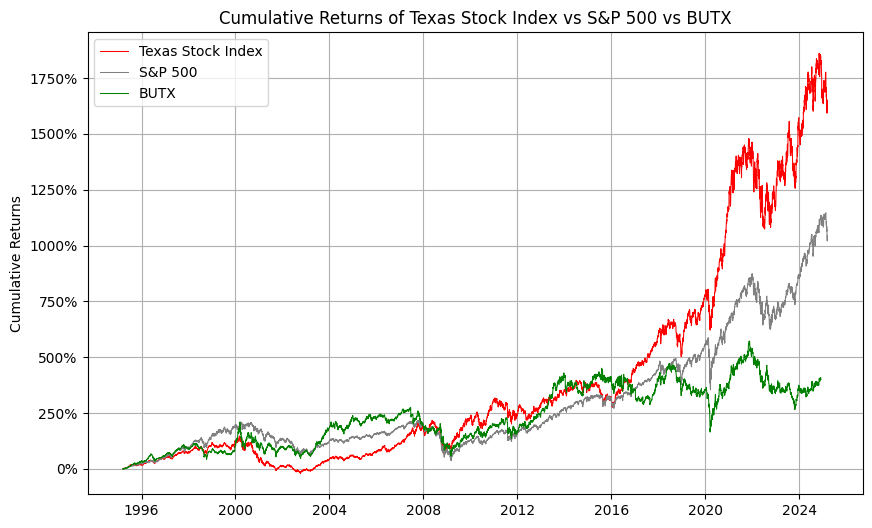

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10, 6))
plt.title('Cumulative Returns of Texas Stock Index vs S&P 500 vs BUTX')
#adjusr lineweight
plt.rcParams['lines.linewidth'] = 0.75
plt.plot(market_weighted_cumulative_returns, label='Texas Stock Index', color ='red')
#plt.plot(cumulative_equal_weighted_returns, label='Equal Weighted', color = 'darkred')
plt.plot(sp500_cumulative_returns, label='S&P 500', color = 'gray')
plt.plot(butx_cumulative_returns, label='BUTX', color = 'green')
plt.ylabel('Cumulative Returns')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
market_weighted_cumulative_returns.to_csv('ut_returns.csv')

In [ ]:
# Show last cumulative returns of each line
print('Market Weighted:', market_weighted_cumulative_returns.iloc[-2])
# print('Equal Weighted:', cumulative_equal_weighted_returns.iloc[-2])
print('S&P 500:', sp500_cumulative_returns.iloc[-2])
print('BUTX:', butx_cumulative_returns.iloc[-2])

Market Weighted: Returns    15.987758
Name: 2025-03-13 00:00:00, dtype: object
S&P 500: 10.202336942186808
BUTX: Price    3.998267
Name: 2024-12-03 00:00:00, dtype: float64


## Rebalancing Comps

In [ ]:
# # Parameters
# horizon = 30  # Backtest horizon in years
# rebalancing_days = [63, 126, 252]  # Default rebalancing period in trading days (roughly 3 months)

# # Quarter  = 63, Semiannual = 126, Monthly = 21

# # Example data (ensure `total_market_caps` index is a DatetimeIndex of trading days)


# rebalancing_dates_dict = {}

# for rebalancing_day in rebalancing_days:
#     bt_end_date = pd.to_datetime(end_date)
#     bt_start_date = bt_end_date - pd.DateOffset(years=horizon)
#     # Find index positions closest to the start and end dates using get_indexer with method='nearest'
#     date_index = total_market_caps.index
#     bt_start_idx = date_index.get_indexer([bt_start_date], method='nearest')[0]  # Nearest trading day to start date
#     bt_end_idx = date_index.get_indexer([bt_end_date], method='nearest')[0]  # Nearest trading day to end date

#     # Calculate rebalancing dates based on rebalancing_days (number of trading days)
#     rebalancing_indices = list(range(bt_start_idx, bt_end_idx, rebalancing_day))

#     # Extract actual rebalancing dates from index, ensuring they are trading days
#     rebalancing_dates = date_index[rebalancing_indices].tolist()

#     # Ensure last date is included if it's not already
#     if rebalancing_dates[-1] != bt_end_date:
#         # If the last rebalancing date is not the exact end date, adjust it to the nearest available trading day
#         last_rebalancing_date = date_index.get_indexer([bt_end_date], method='nearest')[0]
#         rebalancing_dates.append(date_index[last_rebalancing_date])

#     print(rebalancing_dates)
#     rebalancing_dates_dict[rebalancing_day] = rebalancing_dates


In [ ]:
# market_weighted_returns_dict = {}

# for rebalancing_day, rebalancing_dates in rebalancing_dates_dict.items():
#     weights = pd.DataFrame(index=historical_market_caps.index, columns=historical_market_caps.columns)
#     # Loop through each rebalancing date to calculate weights
#     for start_date in rebalancing_dates:
#         # Find the index of the start date and the next rebalancing date (or end date)
#         start_idx = historical_market_caps.index.get_loc(start_date)

#         # Define the end date for the days (next rebalancing date or the last date of the days)
#         if start_idx + rebalancing_day < len(historical_market_caps.index):
#             end_date = historical_market_caps.index[start_idx + rebalancing_day]
#         else:
#             end_date = historical_market_caps.index[-1]  # Use last date if we're near the end

#         # Extract market caps for the given days
#         market_caps_at_start = historical_market_caps.loc[start_date].dropna()  # Drop NaNs for companies with no data

#         # Calculate weights: market cap / sum of market caps (normalize to 1)
#         total_market_cap = market_caps_at_start.sum()
#         weights_for_days = market_caps_at_start / total_market_cap

#         # Propagate weights for this days until the next rebalancing date
#         weights.loc[start_date:end_date, weights_for_days.index] = weights_for_days.values

#     # Step 2: Calculate weighted returns for each days using the weights and returns
#     market_weighted_returns = pd.DataFrame(index=adj_returns_pivot_table.index, columns=['Returns'])

#     # Loop through each date to calculate the weighted returns for that date
#     for date in adj_returns_pivot_table.index:
#         # Get the weights for the given date (from the weights DataFrame)
#         current_weights = weights.loc[date].dropna()

#         # Get the returns for the given date (from the adj_returns_pivot_table DataFrame)
#         valid_columns = current_weights.index.intersection(adj_returns_pivot_table.columns)
#         current_weights = current_weights.loc[valid_columns]  # Filter weights to match returns
#         current_returns = adj_returns_pivot_table.loc[date, valid_columns]  # Match returns to weights

#         # Calculate the weighted return for the date
#         weighted_return = (current_weights * current_returns).sum()

#         # Store the weighted return in the result DataFrame
#         market_weighted_returns.loc[date] = weighted_return
#     market_weighted_returns_dict[rebalancing_day] = market_weighted_returns



In [ ]:
# market_weighted_cumulative_returns_dict = {}

# for rebalancing_day, market_weighted_returns in market_weighted_returns_dict.items():
#     market_weighted_cumulative_returns = market_weighted_returns[market_weighted_returns.index >= bt_start_date]
#     market_weighted_cumulative_returns = pd.Series(index=returns_pivot_table.index, data=0)

#     # Calculate cumulative weighted returns for the portfolio
#     market_weighted_cumulative_returns = (1 + market_weighted_returns).cumprod() - 1
#     market_weighted_cumulative_returns_dict[rebalancing_day] = market_weighted_cumulative_returns

In [ ]:
# import matplotlib.ticker as mtick

# fig = plt.figure(figsize=(10,6))
# ax = plt.gca()
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.title('Market Weighted Cumulative Returns')
# colors = ['red', 'darkred', 'brown']

# for i, (rebalancing_day, market_weighted_cumulative_returns) in enumerate(market_weighted_cumulative_returns_dict.items()):
#     plt.plot(market_weighted_cumulative_returns, label=f'Market Weighted: {rebalancing_day} days', color=colors[i])

# plt.plot(sp500_cumulative_returns, label='S&P 500', color = 'gray')
# plt.plot(butx_cumulative_returns, label='BUTX', color = 'green')
# plt.legend()
# plt.show()

## Count of Companies over time

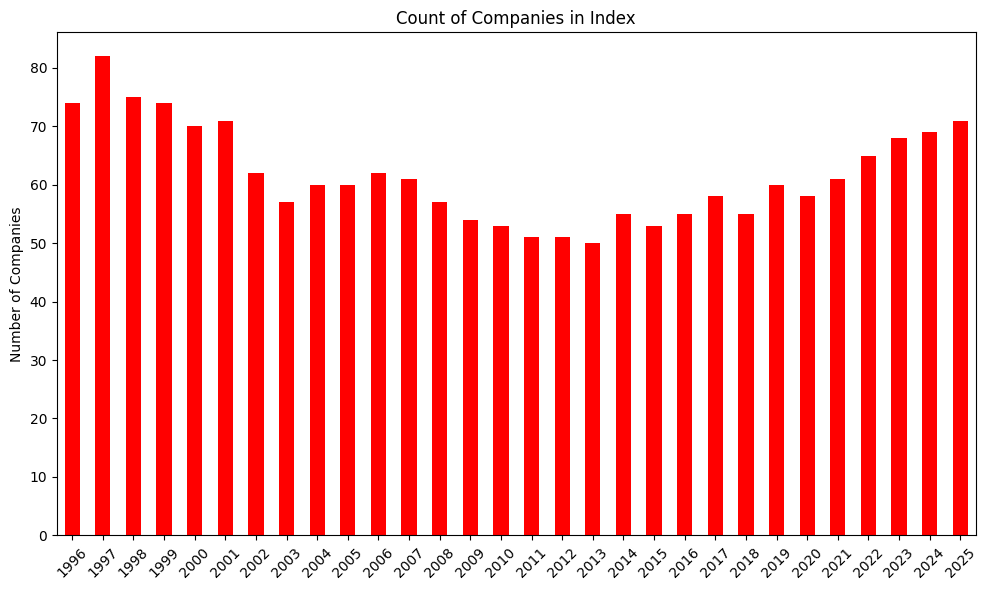

In [ ]:
# Ensure the index is a DatetimeIndex
historical_market_caps.index = pd.to_datetime(historical_market_caps.index)

september_data = historical_market_caps[historical_market_caps.index.month == 1]

# Create a filtered table with only the last available date in September for each year
end_of_september_data = september_data.groupby(september_data.index.year).apply(
    lambda df: df.loc[df.index.max()]
)

# Count non-zero weights for each year
end_of_september_counts = end_of_september_data.apply(lambda row: row[row > 0].count(), axis=1)

# Plot the counts
plt.figure(figsize=(10, 6))
end_of_september_counts.plot(kind='bar', color='red', title='Count of Companies in Index')
plt.xlabel('')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
average_companies = end_of_september_counts.min()
print(f'Average number of companies in index: {average_companies:.2f}')

Average number of companies in index: 50.00


In [ ]:
end_of_september_data.loc[2021][end_of_september_data.loc[2021] > 0].index

MultiIndex([(                                                'AMMO Inc', 1),
            (                              'Accelerate Diagnostics Inc', 1),
            (                                    'Align Technology Inc', 1),
            (                                    'Amkor Technology Inc', 1),
            (                                      'Amtech Systems Inc', 1),
            (                                            'AudioEye Inc', 1),
            (                                               'Avnet Inc', 1),
            (                                     'Axon Enterprise Inc', 1),
            (                               'Benchmark Electronics Inc', 1),
            (                                           'Cable One Inc', 1),
            (                                        'Carlisle Cos Inc', 1),
            (                                              'Carvana Co', 1),
            (                                    'Cavco Industries Inc', 2),

In [ ]:
# What companies were present in 2022
end_of_september_data.loc[2022][end_of_september_data.loc[2022] > 0].index

MultiIndex([(                                                'AMMO Inc', 1),
            (                              'Accelerate Diagnostics Inc', 1),
            (                                    'Align Technology Inc', 1),
            (                                    'Amkor Technology Inc', 1),
            (                                      'Amtech Systems Inc', 1),
            (                                            'AudioEye Inc', 1),
            (                                               'Avnet Inc', 1),
            (                                     'Axon Enterprise Inc', 1),
            (                               'Benchmark Electronics Inc', 1),
            (                                         'CISO Global Inc', 1),
            (                                           'Cable One Inc', 1),
            (                                        'Carlisle Cos Inc', 1),
            (                                              'Carvana Co', 1),

In [ ]:
end_of_september_data.loc[2012]

,,2012
conml,iid,
A V Homes Inc,1,126895500.0
AMMO Inc,1,0.0
APL Ltd,1,0.0
ASR Investments Corp,1,0.0
Accelerate Diagnostics Inc,1,14211840.0
...,...,...
White Electronic Designs Corp,1,0.0
WillScot Holdings Corporation,1,0.0
Wrap Technologies Inc,1,0.0


## Industries

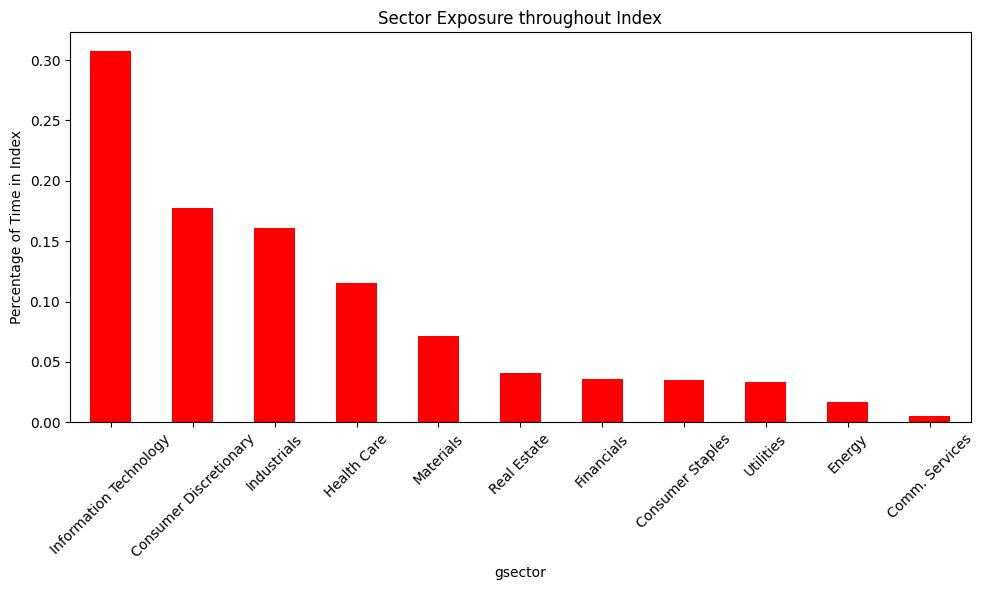

In [ ]:
sector_counts = historical_prices['gsector'].value_counts()
sector_counts
# Find proportions
sector_counts = sector_counts / sector_counts.sum()
plt.figure(figsize=(10, 6))

sector_counts.plot(kind='bar', color='red', title='Sector Exposure throughout Index')
plt.ylabel('Percentage of Time in Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 20000x8000 with 0 Axes>

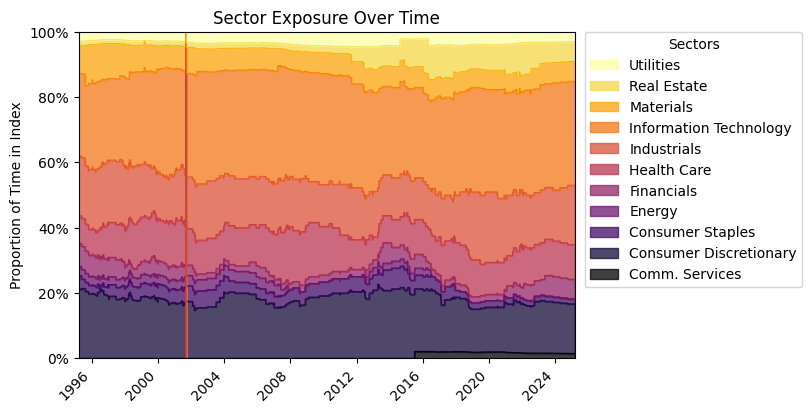

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import matplotlib.colors as mcolors

# Compute sector proportions
sector_proportions = historical_prices.groupby(['datadate', 'gsector']).size().unstack(fill_value=0)
sector_proportions = sector_proportions.div(sector_proportions.sum(axis=1), axis=0)

# Generate a gradient of colors
num_sectors = len(sector_proportions.columns)
cmap = plt.cm.inferno  # Choose a colormap (e.g., plasma, viridis, coolwarm, etc.)
colors = [cmap(i / (num_sectors - 1)) for i in range(num_sectors)]  # Generate gradient colors

# Create the plot
plt.figure(figsize=(50, 20), dpi=400)  # Adjust size as needed
ax = sector_proportions.plot(kind='area', stacked=True, color=colors, title='Sector Exposure Over Time', alpha=0.75)

# Set axis labels
plt.ylabel('Proportion of Time in Index')
plt.xticks(rotation=45)
plt.xlabel('')

# Set x-axis limits to fit data exactly
plt.xlim(sector_proportions.index.min(), sector_proportions.index.max())
plt.ylim(0,1)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Reverse the order of legend items
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Sectors', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Show plot
plt.show()


In [ ]:
# Show average weighting for companies over time not including zeros
# company_weights = historical_market_caps.div(historical_market_caps.sum(axis=1), axis=0)
# company_weights = company_weights.replace(0, np.nan)
# company_weights.mean(axis=0).sort_values(ascending=False).head(10)

company_weights = historical_market_caps.div(historical_market_caps.sum(axis=1), axis=0)
company_weights.mean(axis=0).sort_values(ascending=False).head(10)


,,0
conml,iid,
Freeport-McMoRan Inc,2,0.097341
Southern Copper Corporation,1,0.086395
Safeway Inc,1,0.077628
Gen Digital Inc,1,0.063252
Republic Services Inc.,1,0.057011
Microchip Technology Inc,1,0.052517
Viavi Solutions Inc,1,0.042314
Apollo Education Group Inc,1,0.034088
Pinnacle West Capital Corp,1,0.032708


In [ ]:
# Average time companies spend in index for each company
company_time_in_index = historical_prices.groupby(['conml','iid'])['datadate'].nunique()
company_time_in_index

# Find top 5
company_time_in_index.sort_values(ascending=False).head(10)

# plt.figure(figsize=(10, 6))
# company_time_in_index.plot(kind='hist', bins=30, color='red', edgecolor='black', title='Distribution of Time Companies Spend in Index')
# plt.xlabel('Number of Days in Index')
# plt.ylabel('Number of Companies')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

,,datadate
conml,iid,
Avnet Inc,1,7553
Amtech Systems Inc,1,7552
Benchmark Electronics Inc,1,7552
Carlisle Cos Inc,1,7552
Comtech Telecommunications Corp.,2,7552
Insight Enterprises Inc,1,7552
Gen Digital Inc,1,7552
Pinnacle West Capital Corp,1,7552
Reliance Inc,1,7552


In [ ]:
# Show percentage of time present in index for each company
company_time_in_index = company_time_in_index / len(historical_prices['datadate'].unique())
company_time_in_index.sort_values(ascending=False).head(10)


,,datadate
conml,iid,
Avnet Inc,1,0.999868
Amtech Systems Inc,1,0.999735
Benchmark Electronics Inc,1,0.999735
Carlisle Cos Inc,1,0.999735
Comtech Telecommunications Corp.,2,0.999735
Insight Enterprises Inc,1,0.999735
Gen Digital Inc,1,0.999735
Pinnacle West Capital Corp,1,0.999735
Reliance Inc,1,0.999735


In [ ]:
# Show average market cap formatted in dollars
average_market_cap = historical_market_caps.replace(0, np.nan).mean(axis=0).sort_values(ascending=False).head(10)
average_market_cap_table = pd.DataFrame(average_market_cap)
average_market_cap_table.reset_index(inplace=True)
average_market_cap_table.columns = ['Company', 'iid', 'Average Market Cap']
average_market_cap_table.drop('iid', axis=1, inplace=True)
average_market_cap_table.set_index('Company', inplace=True)
average_market_cap_table

,Average Market Cap
Company,
Southern Copper Corporation,22262384579.812256
Freeport-McMoRan Inc,21913829497.980244
Republic Services Inc.,16412660733.754997
Microchip Technology Inc,12503878770.079174
Gen Digital Inc,11286423058.575232
Safeway Inc,10814825848.482351
GoDaddy Inc,10644820604.229233
Align Technology Inc,9510866939.315971
StandardAero Inc,9291115458.571428


<Figure size 1000x600 with 0 Axes>

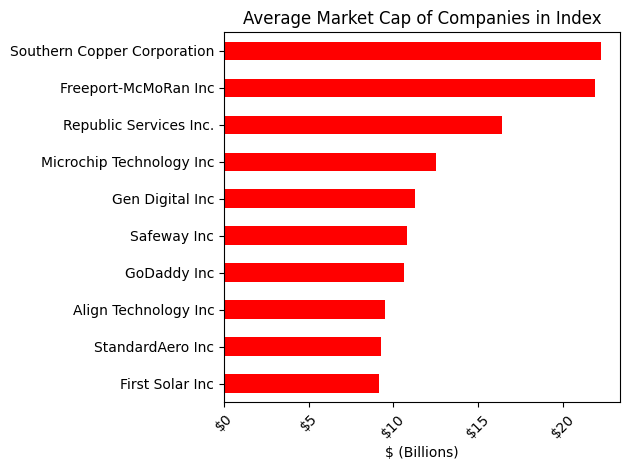

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10, 6))
# Sort largest to smallest
average_market_cap_table = average_market_cap_table.sort_values(by='Average Market Cap', ascending=True)
# Divide values by 1 billion
average_market_cap_table['Average Market Cap'] = average_market_cap_table['Average Market Cap'] / 1000000000
average_market_cap_table.plot(kind='barh', color='red', title='Average Market Cap of Companies in Index')
plt.xlabel('$ (Billions)')
plt.ylabel('')
# Show only first few values from market cap
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
# Remove legend
plt.legend().set_visible(False)
plt.show()


# Set up returns

In [ ]:
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Load S&P 500 data
sp500_data = yf.download('^GSPC', start=bt_start_date, end=bt_end_date)
sp500_returns = sp500_data['Close'].pct_change()

# Assuming you already have the market_weighted_returns and sp500_returns dataframes ready
# Ensure that 'sp500_returns' and 'market_weighted_returns' are aligned in terms of index and values

# # Clean returns data by removing missing values
inv_returns = regression_returns_market_weighted_returns.dropna()
sp500_returns = sp500_returns.dropna()

# Align indices and remove timezones if necessary
inv_returns.index = pd.to_datetime(inv_returns.index).tz_localize(None)
sp500_returns.index = pd.to_datetime(sp500_returns.index).tz_localize(None)

# Merge the returns data on the date index
returns_df = pd.merge(inv_returns, sp500_returns, left_index=True, right_index=True)
returns_df.columns = ['Returns', 'Close']
returns_df

[*********************100%***********************]  1 of 1 completed


,Returns,Close
1995-03-15,0.005574,-0.002049
1995-03-16,0.001327,0.007177
1995-03-17,0.001228,0.000222
1995-03-20,0.00033,0.001251
1995-03-21,-0.000948,-0.002157
...,...,...
2025-03-07,0.012207,0.005521
2025-03-10,-0.033188,-0.026973
2025-03-11,0.003983,-0.007568
2025-03-12,0.009535,0.004887


In [ ]:
# Pull historical t bill rates for risk-free rate
# Use returns df index to get start and end dates

reg_start_date = returns_df.index.min()
reg_end_date = returns_df.index.max()
t_bill_data = yf.download('^IRX', start=reg_start_date, end=reg_end_date)
t_bill_data = t_bill_data['Close'] / 100
t_bill_data['Rf'] = t_bill_data['^IRX'] / 252
t_bill_data

[*********************100%***********************]  1 of 1 completed


Ticker,^IRX,Rf
Date,,
1995-03-15,0.05740,0.000228
1995-03-16,0.05730,0.000227
1995-03-17,0.05730,0.000227
1995-03-20,0.05720,0.000227
1995-03-21,0.05730,0.000227
...,...,...
2025-03-06,0.04197,0.000167
2025-03-07,0.04197,0.000167
2025-03-10,0.04185,0.000166


In [ ]:
returns_df

,Returns,Close
1995-03-15,0.005574,-0.002049
1995-03-16,0.001327,0.007177
1995-03-17,0.001228,0.000222
1995-03-20,0.00033,0.001251
1995-03-21,-0.000948,-0.002157
...,...,...
2025-03-07,0.012207,0.005521
2025-03-10,-0.033188,-0.026973
2025-03-11,0.003983,-0.007568
2025-03-12,0.009535,0.004887


In [ ]:
# Adjust returns for risk-free rate
returns_df['Risk-adj returns'] = returns_df['Returns'] - t_bill_data['Rf']
returns_df['Risk-adj Close'] = returns_df['Close'] - t_bill_data['Rf']
returns_df['Risk-adj returns'].fillna(method='ffill', inplace=True)
returns_df['Risk-adj Close'].fillna(method='ffill', inplace=True)

In [ ]:
# Ensure the columns are numeric
returns_df['Returns'] = pd.to_numeric(returns_df['Returns'], errors='coerce')
returns_df['Close'] = pd.to_numeric(returns_df['Close'], errors='coerce')

returns_df

,Returns,Close,Risk-adj returns,Risk-adj Close
1995-03-15,0.005574,-0.002049,0.005346,-0.002277
1995-03-16,0.001327,0.007177,0.001099,0.006949
1995-03-17,0.001228,0.000222,0.001001,-0.000005
1995-03-20,0.000330,0.001251,0.000103,0.001024
1995-03-21,-0.000948,-0.002157,-0.001176,-0.002384
...,...,...,...,...
2025-03-07,0.012207,0.005521,0.012041,0.005354
2025-03-10,-0.033188,-0.026973,-0.033354,-0.027139
2025-03-11,0.003983,-0.007568,0.003817,-0.007734
2025-03-12,0.009535,0.004887,0.009368,0.004720


##Total Regression (Daily)

                            OLS Regression Results                            
Dep. Variable:       Risk-adj returns   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:00:24   Log-Likelihood:                 24298.
No. Observations:                7550   AIC:                        -4.859e+04
Df Residuals:                    7548   BIC:                        -4.858e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.658e-05      0.000      0.

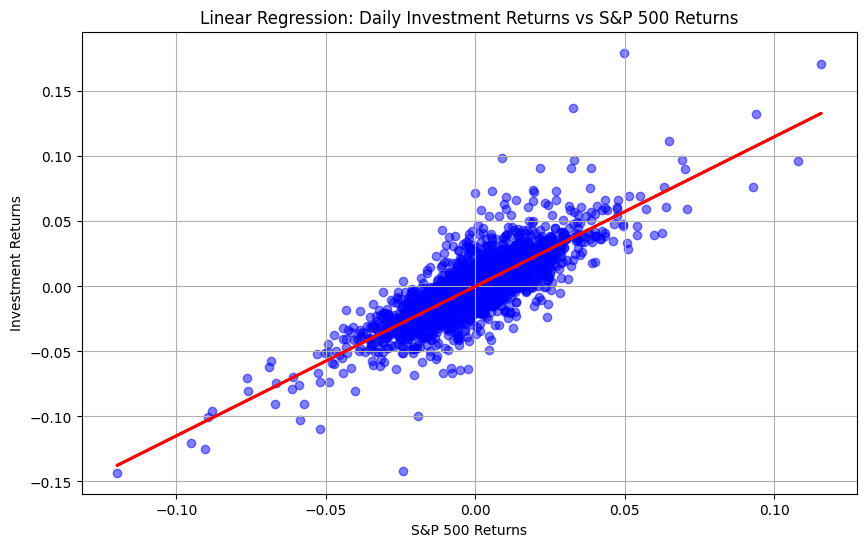

In [ ]:
# Perform linear regression
X = returns_df['Risk-adj Close']
Y = returns_df['Risk-adj returns']
# Remove inf

X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(Y, X).fit()  # Fit the model
results = model.summary()
print(results)

# Visualize the regression
plt.figure(figsize=(10, 6))
plt.scatter(returns_df['Risk-adj Close'], returns_df['Risk-adj returns'], color='blue', alpha=0.5)
plt.plot(returns_df['Risk-adj Close'], model.predict(X), color='red', linewidth=2)
plt.xlabel('S&P 500 Returns')
plt.ylabel('Investment Returns')
plt.title('Linear Regression: Daily Investment Returns vs S&P 500 Returns')
plt.grid(True)
plt.show()

## Rolling Regression

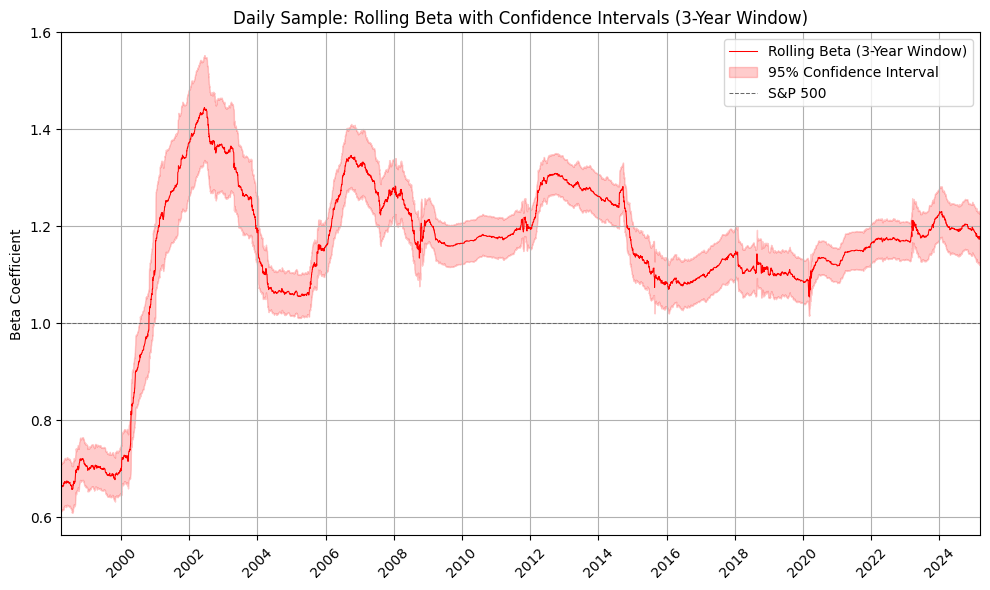

In [ ]:
from statsmodels.regression.rolling import RollingOLS
import matplotlib.dates as mdates


# Perform rolling regression (3-year window)
daily_window = 3 * 252  # 3 years of trading days
X_daily = sm.add_constant(returns_df['Risk-adj Close'])
Y_daily = returns_df['Risk-adj returns']
rolling_model_daily = RollingOLS(Y_daily, X_daily, window=daily_window).fit()

# Extract daily rolling metrics
rolling_betas_daily = rolling_model_daily.params['Risk-adj Close']
rolling_alphas_daily = rolling_model_daily.params['const']  # Alpha is the intercept
rolling_r2_daily = rolling_model_daily.rsquared
rolling_std_daily = returns_df['Risk-adj returns'].rolling(window=252).std()

# Annualize the daily standard deviation (multiply by sqrt(252) for daily data)
annualized_std_daily = rolling_std_daily * (252 ** 0.5)

# Annualize daily alpha (multiply by 252)
annualized_alphas_daily = rolling_alphas_daily * 252


import matplotlib.colors as mcolors




### CONFIDENCE INTERVALS FOR BETA
z = 1.96

beta_std_errors_daily = rolling_model_daily.bse['Risk-adj Close']
beta_upper_daily = rolling_betas_daily + z * beta_std_errors_daily
beta_lower_daily = rolling_betas_daily - z * beta_std_errors_daily

start_date = bt_start_date
end_date = rolling_betas_daily.index.max()
# Updated plot for rolling beta with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rolling_betas_daily, label='Rolling Beta (3-Year Window)', color='red')
ax.fill_between(rolling_betas_daily.index, beta_lower_daily, beta_upper_daily, color='red', alpha=0.2, label='95% Confidence Interval')
ax.axhline(y=1, color='dimgrey', linestyle='--', label='S&P 500')
ax.set_title('Daily Sample: Rolling Beta with Confidence Intervals (3-Year Window)')
ax.set_ylabel('Beta Coefficient')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.set_xlim(pd.to_datetime('1998-04-01'), pd.to_datetime(end_date))
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

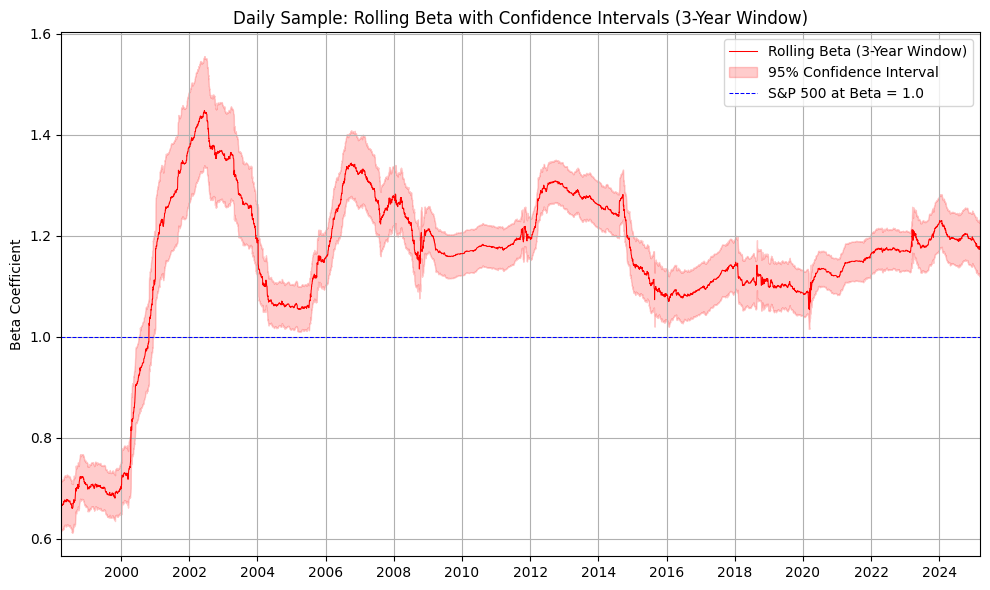

In [ ]:
from statsmodels.regression.rolling import RollingOLS
import matplotlib.dates as mdates

# Perform rolling regression (3-year window)
daily_window = 3 * 252  # 3 years of trading days
X_daily = sm.add_constant(returns_df['Close'])
Y_daily = returns_df['Returns']
rolling_model_daily = RollingOLS(Y_daily, X_daily, window=daily_window).fit()

# Extract daily rolling metrics
rolling_betas_daily = rolling_model_daily.params['Close']
rolling_alphas_daily = rolling_model_daily.params['const']  # Alpha is the intercept
rolling_r2_daily = rolling_model_daily.rsquared
rolling_std_daily = returns_df['Returns'].rolling(window=252).std()

# Annualize the daily standard deviation (multiply by sqrt(252) for daily data)
annualized_std_daily = rolling_std_daily * (252 ** 0.5)

# Annualize daily alpha (multiply by 252)
annualized_alphas_daily = rolling_alphas_daily * 252


import matplotlib.colors as mcolors




### CONFIDENCE INTERVALS FOR BETA
z = 1.96

beta_std_errors_daily = rolling_model_daily.bse['Close']
beta_upper_daily = rolling_betas_daily + z * beta_std_errors_daily
beta_lower_daily = rolling_betas_daily - z * beta_std_errors_daily

start_date = bt_start_date
end_date = rolling_betas_daily.index.max()
# Updated plot for rolling beta with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rolling_betas_daily, label='Rolling Beta (3-Year Window)', color='red')
ax.fill_between(rolling_betas_daily.index, beta_lower_daily, beta_upper_daily, color='red', alpha=0.2, label='95% Confidence Interval')
ax.axhline(y=1, color='blue', linestyle='--', label='S&P 500 at Beta = 1.0')
ax.set_title('Daily Sample: Rolling Beta with Confidence Intervals (3-Year Window)')
ax.set_ylabel('Beta Coefficient')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.set_xlim(pd.to_datetime('1998-04-01'), pd.to_datetime(end_date))
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Show betas in a dataframe
betas_df = pd.DataFrame({'Beta': rolling_betas_daily, 'Lower Bound': beta_lower_daily, 'Upper Bound': beta_upper_daily})
betas_df = betas_df.dropna()
betas_df

,Beta,Lower Bound,Upper Bound
1998-03-11,0.663555,0.614683,0.712428
1998-03-12,0.663914,0.615074,0.712754
1998-03-13,0.664014,0.615122,0.712907
1998-03-16,0.664009,0.615152,0.712867
1998-03-17,0.664011,0.615153,0.712870
...,...,...,...
2025-03-07,1.178935,1.125893,1.231976
2025-03-10,1.179205,1.126380,1.232030
2025-03-11,1.177687,1.124775,1.230599
2025-03-12,1.176622,1.123446,1.229798


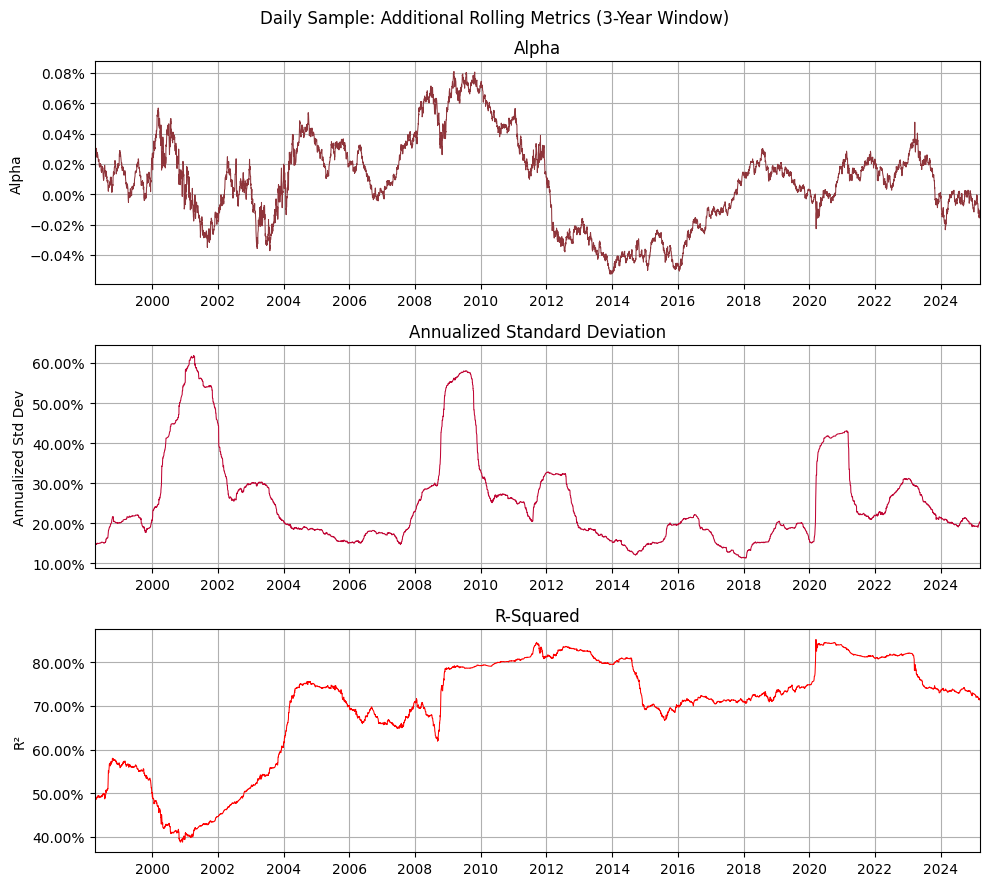

In [ ]:

cola = [(144/256,53/256,59/256)]
colb = [(255/256,0/256,0/256,255/256)]
colc = [(193/256,5/256,52/256,255/256)]
cold = [(255/256,128/256,128/256,255/256)]

### PLOTTING DAILY SAMPLE
fig_daily, axes_daily = plt.subplots(3, 1, figsize=(10, 9), sharex=False)
fig_daily.suptitle("Daily Sample: Additional Rolling Metrics (3-Year Window)")
# Plot rolling beta for daily sample
# axes_daily[0].plot(rolling_betas_daily, color='red')
# axes_daily[0].axhline(y=1, color='black', linestyle='--', label='S&P 500 at Beta = 1.0')
# axes_daily[0].set_title('Rolling Beta')
# axes_daily[0].set_ylabel('Beta Coefficient')
# axes_daily[0].set_xlim(pd.to_datetime('1998-04-01'), pd.to_datetime(bt_end_date))
# axes_daily[0].xaxis.set_major_locator(mdates.YearLocator(2))
# axes_daily[0].legend()
# axes_daily[0].grid(True)

# Plot rolling alpha for daily sample (annualized)
axes_daily[0].plot(rolling_alphas_daily, label='Annualized Alpha (3-Year Window)', color=cola[0])
axes_daily[0].set_title('Alpha')
axes_daily[0].set_ylabel('Alpha')
axes_daily[0].set_xlim(pd.to_datetime('1998-04-01'), pd.to_datetime(bt_end_date))
axes_daily[0].xaxis.set_major_locator(mdates.YearLocator(2))
axes_daily[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=2))
axes_daily[0].grid(True)

# # Plot annualized rolling standard deviation for daily sample
axes_daily[1].plot(annualized_std_daily, label='Annualized Std Dev (3-Year Window)', color=colc[0])
axes_daily[1].set_title('Annualized Standard Deviation')
axes_daily[1].set_ylabel('Annualized Std Dev')
axes_daily[1].set_xlim(pd.to_datetime('1998-04-01'), pd.to_datetime(bt_end_date))
axes_daily[1].xaxis.set_major_locator(mdates.YearLocator(2))
axes_daily[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=2))


axes_daily[1].grid(True)

# Plot rolling R² for daily sample
axes_daily[2].plot(rolling_r2_daily, label='Rolling R² (3-Year Window)', color=colb[0])
axes_daily[2].set_title('R-Squared')
axes_daily[2].set_ylabel('R²')
axes_daily[2].set_xlim(pd.to_datetime('1998-04-01'), pd.to_datetime(bt_end_date))
axes_daily[2].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=2))


axes_daily[2].xaxis.set_major_locator(mdates.YearLocator(2))

axes_daily[2].grid(True)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(rolling_r2_daily)

,0
1995-03-15,NaN
1995-03-16,NaN
1995-03-17,NaN
1995-03-20,NaN
1995-03-21,NaN
...,...
2025-03-07,0.715671
2025-03-10,0.717422
2025-03-11,0.716234
2025-03-12,0.713836


In [ ]:
# Show regression outputs over time


In [ ]:
import warnings
warnings.filterwarnings("ignore")

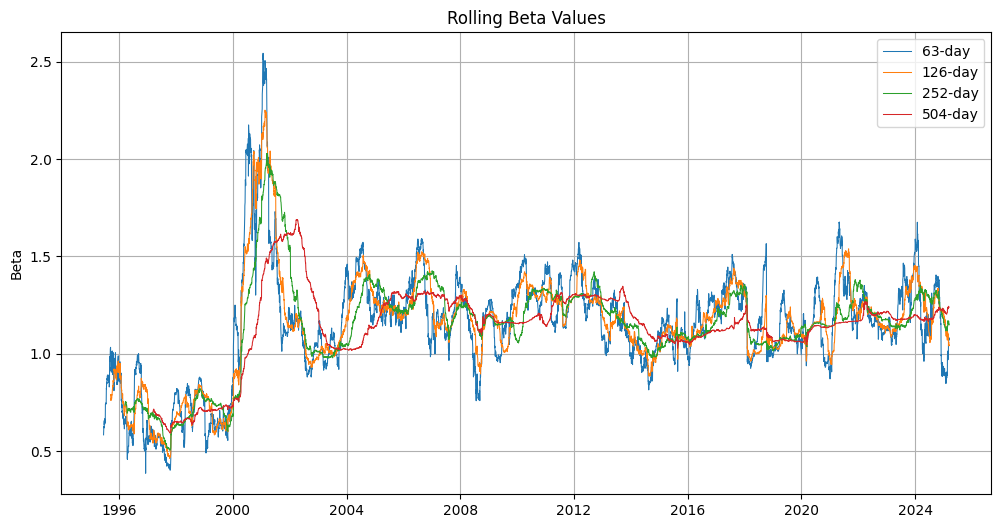

             Returns     Close  63_day_beta  126_day_beta  252_day_beta  \
1995-03-15  0.005574 -0.002049          NaN           NaN           NaN   
1995-03-16  0.001327  0.007177          NaN           NaN           NaN   
1995-03-17  0.001228  0.000222          NaN           NaN           NaN   
1995-03-20  0.000330  0.001251          NaN           NaN           NaN   
1995-03-21 -0.000948 -0.002157          NaN           NaN           NaN   
...              ...       ...          ...           ...           ...   
2025-03-07  0.012207  0.005521     1.056390      1.047163      1.166844   
2025-03-10 -0.033188 -0.026973     1.084217      1.059844      1.167158   
2025-03-11  0.003983 -0.007568     1.069624      1.042114      1.151883   
2025-03-12  0.009535  0.004887     1.077434      1.046624      1.153558   
2025-03-13 -0.009459 -0.013891     1.078069      1.041486      1.148626   

            504_day_beta  
1995-03-15           NaN  
1995-03-16           NaN  
1995-03-17        

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def rolling_regression(x:str, y:str, sample:pd.DataFrame) -> float:
    '''Run regression for dataframe slice, return beta'''
    sample = sample[[x, y]].dropna()
    if len(sample) < 2:  # Avoid regression with too few points
        return np.nan
    X = sm.add_constant(sample[x])
    Y = sample[y]
    model = sm.OLS(Y, X).fit()
    return model.params[1]

# Collect rolling beta values and add as columns
for window_length in [63, 126, 252, 504]:
    window_betas = [np.nan] * (window_length - 1)
    for i in range(window_length - 1, len(returns_df)):
        returns_df_slice = returns_df.iloc[i - window_length + 1 : i + 1]
        try:
            beta_value = rolling_regression('Close', 'Returns', returns_df_slice)
            window_betas.append(beta_value)
        except Exception as e:
            print(f"Error at index {i}: {e}")
            window_betas.append(np.nan)

    # Ensure correct length of window_betas
    while len(window_betas) < len(returns_df):
        window_betas.append(np.nan)

    returns_df[f'{window_length}_day_beta'] = window_betas

# Plot outcome
plt.figure(figsize=(12, 6))
for window_length in [63, 126, 252, 504]:
    plt.plot(returns_df.index, returns_df[f'{window_length}_day_beta'], label=f'{window_length}-day')

plt.legend()
plt.title('Rolling Beta Values')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

# Show alpha and other outputs over time
print(returns_df[['Returns', 'Close', '63_day_beta', '126_day_beta', '252_day_beta', '504_day_beta']])

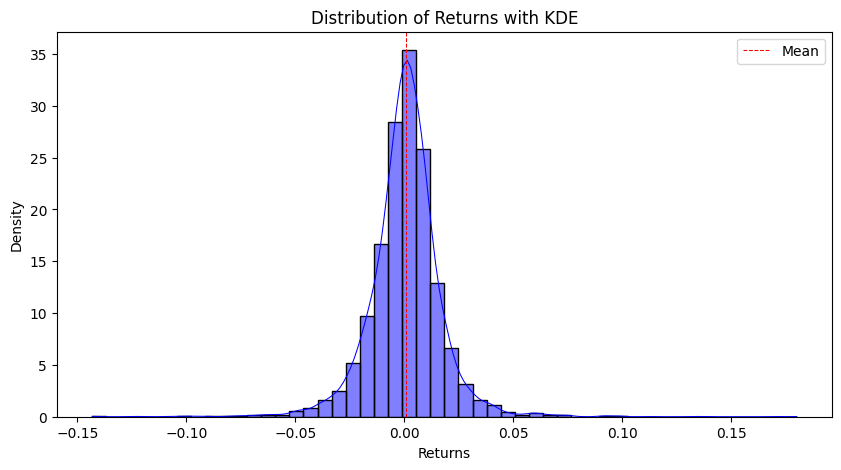

Skewness: 0.1335
Kurtosis: 10.2690
Jarque-Bera Test: Statistic=33196.0639, p-value=0.0000
The returns distribution is NOT normally distributed (Jarque-Bera test).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera, skew, kurtosis

# Load your returns data
# Example: Assuming you have a CSV with a 'Returns' column
# Calculate statistics
returns = returns_df['Returns'].dropna()  # Drop missing values if any
skewness = skew(returns)
kurt = kurtosis(returns)
jb_stat, jb_pval = jarque_bera(returns)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(returns, bins=50, kde=True, color='blue', stat="density")
plt.title("Distribution of Returns with KDE")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.axvline(returns.mean(), color='red', linestyle='dashed', label='Mean')
plt.legend()
plt.show()

# Print results
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Jarque-Bera Test: Statistic={jb_stat:.4f}, p-value={jb_pval:.4f}")

# Interpretation
if jb_pval < 0.05:
    print("The returns distribution is NOT normally distributed (Jarque-Bera test).")
else:
    print("The returns distribution appears to be normal (Jarque-Bera test).")


#FF Analysis

In [ ]:
import yfinance as yf

# define tickers
tickers = ['IJR', 'VLUE', 'QUAL', 'MMTM']
start_date = '2015-03-12'
end_date = '2025-03-14'

ff_data = []
# download data
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    ff_data.append(data['Close'].pct_change().dropna())

ff_data = pd.concat(ff_data, axis=1)
ff_data.columns = tickers
ff_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,IJR,VLUE,QUAL,MMTM
Date,,,,
2015-03-13,-0.003513,-0.002895,-0.006765,0.010225
2015-03-16,0.003439,0.011616,0.014731,-0.002047
2015-03-17,0.002142,-0.001813,-0.004371,0.011510
2015-03-18,0.009148,0.011049,0.012230,-0.004281
2015-03-19,0.001864,-0.006138,-0.000155,0.000000
...,...,...,...,...
2025-03-07,0.005128,0.012569,0.003462,0.005497
2025-03-10,-0.023467,-0.015079,-0.022338,-0.034935
2025-03-11,-0.005509,-0.017457,-0.012321,0.001750


In [ ]:
offset_start_date = pd.to_datetime(start_date) + pd.DateOffset(days=1)
print(offset_start_date)
returns_df_sample = returns_df.loc[offset_start_date:end_date]
returns_df_sample = returns_df_sample[['Risk-adj returns', 'Risk-adj Close']]
returns_df_sample

2015-03-13 00:00:00


,Risk-adj returns,Risk-adj Close
2015-03-13,-0.011056,-0.006076
2015-03-16,0.007023,0.013532
2015-03-17,-0.003362,-0.003322
2015-03-18,0.016491,0.012157
2015-03-19,-0.009946,-0.004873
...,...,...
2025-03-07,0.012041,0.005354
2025-03-10,-0.033354,-0.027139
2025-03-11,0.003817,-0.007734
2025-03-12,0.009368,0.004720


In [ ]:
combined_data = pd.concat([returns_df_sample, ff_data], axis=1)
combined_data.columns = ['excess_ret', 'MKT_excess', 'SMB', 'HML', 'RMW', 'CMA']
combined_data

,excess_ret,MKT_excess,SMB,HML,RMW,CMA
2015-03-13,-0.011056,-0.006076,-0.003513,-0.002895,-0.006765,0.010225
2015-03-16,0.007023,0.013532,0.003439,0.011616,0.014731,-0.002047
2015-03-17,-0.003362,-0.003322,0.002142,-0.001813,-0.004371,0.011510
2015-03-18,0.016491,0.012157,0.009148,0.011049,0.012230,-0.004281
2015-03-19,-0.009946,-0.004873,0.001864,-0.006138,-0.000155,0.000000
...,...,...,...,...,...,...
2025-03-07,0.012041,0.005354,0.005128,0.012569,0.003462,0.005497
2025-03-10,-0.033354,-0.027139,-0.023467,-0.015079,-0.022338,-0.034935
2025-03-11,0.003817,-0.007734,-0.005509,-0.017457,-0.012321,0.001750
2025-03-12,0.009368,0.004720,-0.004393,-0.002375,0.002108,0.009024


In [ ]:
def rolling_regression(df, window=750):
    results = {"alpha": [], "beta_MKT": [], "beta_SMB": [], "beta_HML": [], "beta_RMW": [], "beta_CMA": [], "r2": [], "date": []}

    for i in range(window, len(df)):
        subset = df.iloc[i - window:i]  # Select rolling window of data

        # Define independent (X) and dependent (Y) variables
        X = subset[["MKT_excess", "SMB", "HML", "RMW", "CMA"]]
        X = sm.add_constant(X)  # Add intercept for alpha
        Y = subset["excess_ret"]

        # Run regression
        model = sm.OLS(Y, X).fit()
        results["alpha"].append(model.params["const"])
        results["beta_MKT"].append(model.params["MKT_excess"])
        results["beta_SMB"].append(model.params["SMB"])
        results["beta_HML"].append(model.params["HML"])
        results["beta_RMW"].append(model.params["RMW"])
        results["beta_CMA"].append(model.params["CMA"])
        results["r2"].append(model.rsquared)
        results["date"].append(df.index[i])  # Store date for plotting

    return pd.DataFrame(results).set_index("date")

# Run rolling regression
rolling_results = rolling_regression(combined_data)


In [ ]:
rolling_results

,alpha,beta_MKT,beta_SMB,beta_HML,beta_RMW,beta_CMA,r2
date,,,,,,,
2018-03-06,0.000171,0.923961,0.339731,0.311804,-0.498218,0.001256,0.776505
2018-03-07,0.000189,0.907996,0.344387,0.312669,-0.489713,0.003843,0.776364
2018-03-08,0.000192,0.907959,0.342456,0.313644,-0.487226,0.003039,0.776367
2018-03-09,0.000195,0.908998,0.343576,0.313299,-0.490102,0.004009,0.776407
2018-03-12,0.000186,0.905801,0.344711,0.313401,-0.490706,0.004738,0.776518
...,...,...,...,...,...,...,...
2025-03-07,-0.000219,-0.147321,0.396845,0.324422,0.489397,0.125581,0.793949
2025-03-10,-0.000215,-0.147251,0.394985,0.328408,0.487634,0.126076,0.793995
2025-03-11,-0.000218,-0.135108,0.395716,0.324962,0.474152,0.131982,0.794685


## Rolling FF Regression

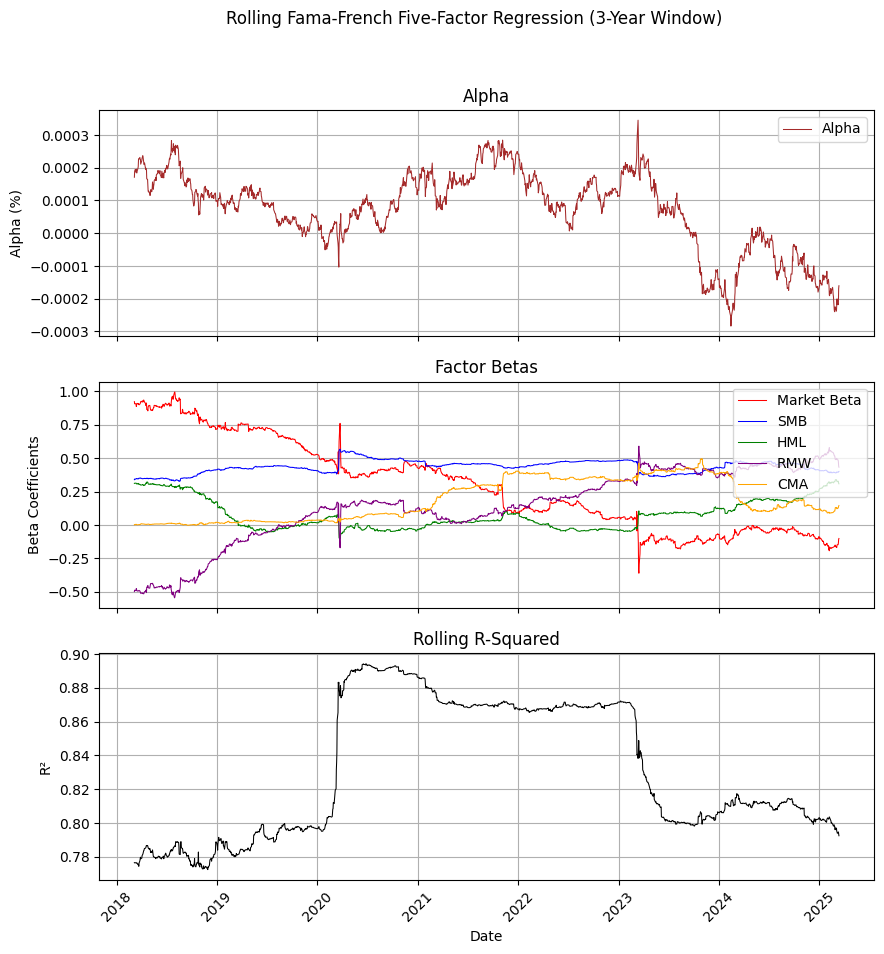

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
fig.suptitle("Rolling Fama-French Five-Factor Regression (3-Year Window)")

# Alpha (Annualized)
axes[0].plot(rolling_results.index, rolling_results["alpha"], label="Alpha", color="brown")
axes[0].set_title("Alpha")
axes[0].set_ylabel("Alpha (%)")

axes[0].legend()
axes[0].grid(True)

# Betas
axes[1].plot(rolling_results.index, rolling_results["beta_MKT"], label="Market Beta", color="red")
axes[1].plot(rolling_results.index, rolling_results["beta_SMB"], label="SMB", color="blue")
axes[1].plot(rolling_results.index, rolling_results["beta_HML"], label="HML", color="green")
axes[1].plot(rolling_results.index, rolling_results["beta_RMW"], label="RMW", color="purple")
axes[1].plot(rolling_results.index, rolling_results["beta_CMA"], label="CMA", color="orange")
axes[1].set_title("Factor Betas")
axes[1].set_ylabel("Beta Coefficients")
axes[1].legend()
axes[1].grid(True)

# R-Squared
axes[2].plot(rolling_results.index, rolling_results["r2"], label="R²", color="black")
axes[2].set_title("Rolling R-Squared")
axes[2].set_ylabel("R²")
axes[2].set_xlabel("Date")

axes[2].grid(True)

plt.xticks(rotation=45)
plt.show()


## Overall Regression

In [ ]:
X = combined_data[["MKT_excess", "SMB", "HML", "RMW", "CMA"]]
X = sm.add_constant(X)  # Adds an intercept term

# Define dependent variable (excess return)
y = combined_data["excess_ret"]

# Run regression
model = sm.OLS(y, X).fit()

# Print summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2286.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:02:01   Log-Likelihood:                 9175.5
No. Observations:                2516   AIC:                        -1.834e+04
Df Residuals:                    2510   BIC:                        -1.830e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.566e-05      0.000      0.282      0.7

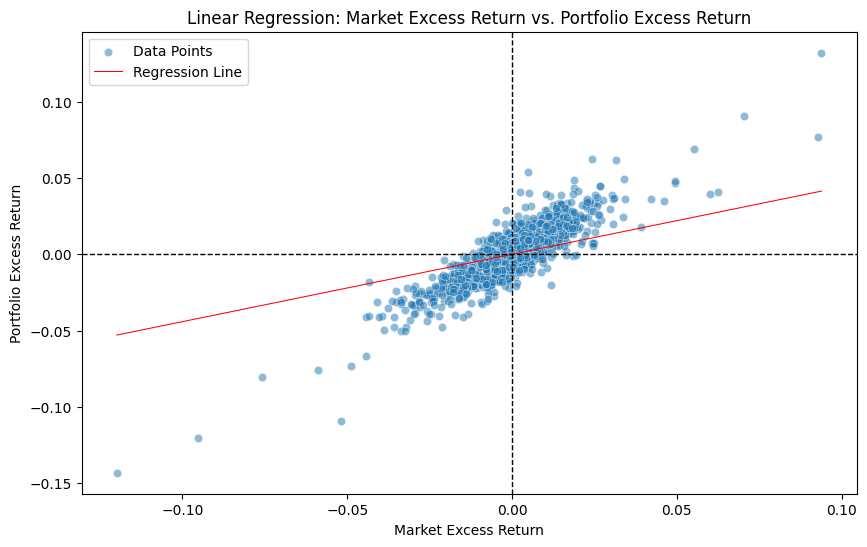

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot of Market Excess Return vs. Portfolio Excess Return
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data["MKT_excess"], y=combined_data["excess_ret"], alpha=0.5, label="Data Points")

# Regression line
x_range = np.linspace(combined_data["MKT_excess"].min(), combined_data["MKT_excess"].max(), 100)
y_pred = model.params["const"] + model.params["MKT_excess"] * x_range
plt.plot(x_range, y_pred, color='red', label="Regression Line")

# Formatting
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.axvline(0, color="black", linewidth=1, linestyle="--")
plt.xlabel("Market Excess Return")
plt.ylabel("Portfolio Excess Return")
plt.title("Linear Regression: Market Excess Return vs. Portfolio Excess Return")
plt.legend()
plt.show()

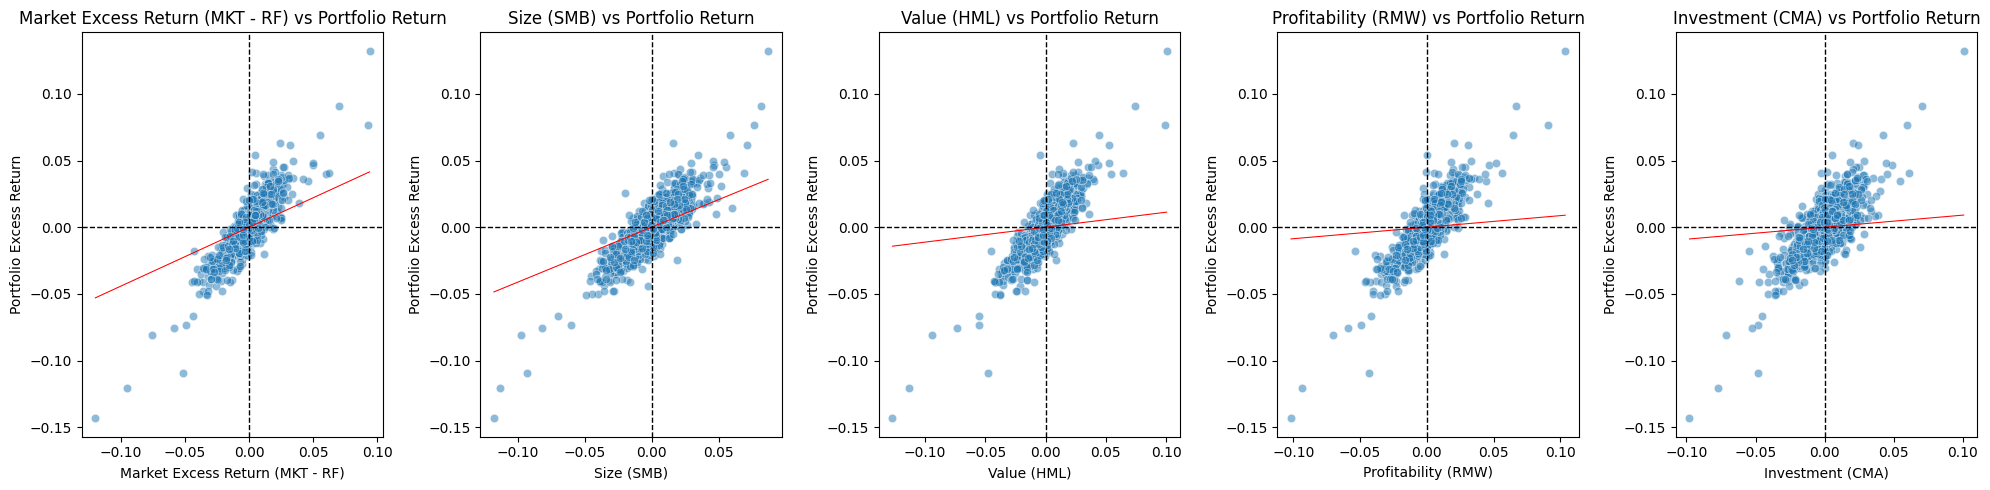

In [ ]:
# Create scatterplots for all factors
factors = ["MKT_excess", "SMB", "HML", "RMW", "CMA"]
factor_names = ["Market Excess Return (MKT - RF)", "Size (SMB)", "Value (HML)", "Profitability (RMW)", "Investment (CMA)"]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 5 subplots for 5 factors

for i, factor in enumerate(factors):
    # Scatter plot
    sns.scatterplot(x=combined_data[factor], y=combined_data["excess_ret"], alpha=0.5, ax=axes[i])

    # Regression line
    x_range = np.linspace(combined_data[factor].min(), combined_data[factor].max(), 100)
    y_pred = model.params["const"] + model.params[factor] * x_range
    axes[i].plot(x_range, y_pred, color='red')

    # Formatting
    axes[i].axhline(0, color="black", linewidth=1, linestyle="--")
    axes[i].axvline(0, color="black", linewidth=1, linestyle="--")
    axes[i].set_xlabel(factor_names[i])
    axes[i].set_ylabel("Portfolio Excess Return")
    axes[i].set_title(f"{factor_names[i]} vs Portfolio Return")

plt.tight_layout()
plt.show()


# State returns

In [ ]:
state_data = pd.read_csv('/content/drive/MyDrive/state data stock index/state_returns.csv')
state_data['Date'] = pd.to_datetime(state_data['Date'])
state_data.set_index('Date', inplace=True)
state_data

,S&P 500,Utah,New Mexico,Colorado,Arizona,Montana,Idaho,Nevada
Date,,,,,,,,
1995-03-15 00:00:00-05:00,-0.002049,0.008949,0.017723,0.003115,0.005793,0.000171,0.001347,-0.003865
1995-03-16 00:00:00-05:00,0.005113,0.006508,0.017728,-0.009346,0.006660,0.006052,0.000516,-0.004777
1995-03-17 00:00:00-05:00,0.005336,-0.005004,0.015433,0.015576,0.007930,0.000694,0.001130,-0.003756
1995-03-20 00:00:00-05:00,0.006594,0.003005,0.012854,0.034268,0.008006,0.012548,0.022362,0.008251
1995-03-21 00:00:00-05:00,0.004423,0.011512,-0.005058,0.018692,0.007180,0.016636,0.028550,0.008649
...,...,...,...,...,...,...,...,...
2025-03-10 00:00:00-04:00,10.391101,9.104081,10.216012,5.190335,15.925160,18.572902,12.952388,11.430982
2025-03-11 00:00:00-04:00,10.304895,9.084833,10.301808,5.246228,15.979939,18.825011,13.198476,11.312576
2025-03-12 00:00:00-04:00,10.360140,9.026791,10.157334,5.377849,16.141084,19.281433,13.768356,11.090516


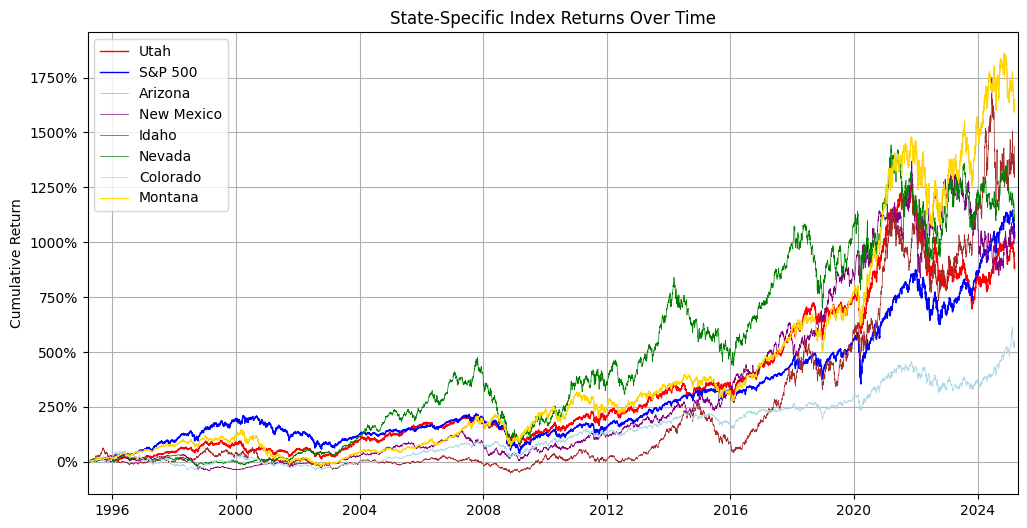

In [ ]:
import matplotlib.ticker as mtick

# show state values over time
plt.figure(figsize=(12, 6))
plt.plot(state_data['Utah'], label='Utah', color='red', linewidth=1)  # Adjusted line weight
plt.plot(state_data['S&P 500'], label='S&P 500', color='blue', linewidth=1)  # Adjusted line weight
# plt.plot(state_data['Montana'], label='Montana', color='gold', linewidth=0.5)  # Adjusted line weight
plt.plot(state_data['Arizona'], label='Arizona', color='orange', linewidth=0.5)  # Adjusted line weight
plt.plot(state_data['New Mexico'], label='New Mexico',  color='purple', linewidth=0.5)  # Adjusted line weight
plt.plot(state_data['Idaho'], label='Idaho', color='brown', linewidth=0.5)  # Adjusted line weight
plt.plot(state_data['Nevada'], label='Nevada', color='green', linewidth=0.5)  # Adjusted line weight
plt.plot(state_data['Colorado'], label='Colorado',color='lightblue', linewidth=0.5)  # Adjusted line weight
plt.plot(market_weighted_cumulative_returns, label='Montana', color='gold')

plt.title('State-Specific Index Returns Over Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#set x limit
plt.xlim(pd.to_datetime('1995-03-14'), pd.to_datetime('2025-04-18'))

plt.xticks(rotation=0)
plt.show()

In [ ]:
# Show last cumulative returns
state_data.iloc[-1]

,2025-03-14 00:00:00-04:01
S&P 500,10.440564
Utah,9.025198
New Mexico,10.392760
Colorado,5.500095
Arizona,16.473955
Montana,19.658019
Idaho,14.356800
Nevada,11.221330


In [ ]:
market_weighted_cumulative_returns.iloc[-1]

,2025-03-14
Returns,16.473955
